In [1]:
# Try some predictions with an SVM:

# https://www.geeksforgeeks.org/predicting-stock-price-direction-using-support-vector-machines/

from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 

# TDODO look at differences in SVM and SVC

import pandas as pd 
import numpy as np 
  
# To plot 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('all_stocks_5yr.csv')
df.head()

date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

In [3]:
df.describe()

open           high            low          close  \
count  619029.000000  619032.000000  619032.000000  619040.000000   
mean       83.023334      83.778311      82.256096      83.043763   
std        97.378769      98.207519      96.507421      97.389748   
min         1.620000       1.690000       1.500000       1.590000   
25%        40.220000      40.620000      39.830000      40.245000   
50%        62.590000      63.150000      62.020000      62.620000   
75%        94.370000      95.180000      93.540000      94.410000   
max      2044.000000    2067.990000    2035.110000    2049.000000   

             volume  
count  6.190400e+05  
mean   4.321823e+06  
std    8.693610e+06  
min    0.000000e+00  
25%    1.070320e+06  
50%    2.082094e+06  
75%    4.284509e+06  
max    6.182376e+08

In [4]:
# Get all unique stock names:

unique_values = df['Name'].unique()
print(unique_values)

['AAL' 'AAPL' 'AAP' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADSK' 'ADS' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB' 'ALGN' 'ALK' 'ALLE' 'ALL' 'ALXN' 'AMAT' 'AMD' 'AME' 'AMGN'
 'AMG' 'AMP' 'AMT' 'AMZN' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APC'
 'APD' 'APH' 'APTV' 'ARE' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP'
 'AYI' 'AZO' 'A' 'BAC' 'BAX' 'BA' 'BBT' 'BBY' 'BDX' 'BEN' 'BF.B' 'BHF'
 'BHGE' 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BRK.B' 'BSX' 'BWA' 'BXP' 'CAG'
 'CAH' 'CAT' 'CA' 'CBG' 'CBOE' 'CBS' 'CB' 'CCI' 'CCL' 'CDNS' 'CELG' 'CERN'
 'CFG' 'CF' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CINF' 'CI' 'CLX' 'CL' 'CMA' 'CMCSA'
 'CME' 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COL' 'COO' 'COP' 'COST'
 'COTY' 'CPB' 'CRM' 'CSCO' 'CSRA' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS'
 'CVX' 'CXO' 'C' 'DAL' 'DE' 'DFS' 'DGX' 'DG' 'DHI' 'DHR' 'DISCA' 'DISCK'
 'DISH' 'DIS' 'DLR' 'DLTR' 'DOV' 'DPS' 'DRE' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN'
 'DWDP' 'DXC' 'D' 'EA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'E

In [5]:
# Filter down to just one stock
df = df.rename(columns={'Name': 'Ticks'})

amzn = df.loc[df['Ticks'] == 'AMZN']
amzn.head()

date    open    high      low   close   volume Ticks
46387  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN
46388  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN
46389  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN
46390  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN
46391  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN

In [6]:
amzn.index = pd.to_datetime(amzn['date']) 

amzn = amzn.drop(['date'], axis='columns') 

In [7]:
# Create predictor variables 
amzn['Open-Close'] = amzn['open'] - amzn['close']
amzn['High-Low'] = amzn['high'] - amzn['low']
  
# Store all predictor variables in a variable X 
X = amzn[['Open-Close', 'High-Low']] 
X.head() 

Open-Close  High-Low
date                            
2013-02-08       -0.55     4.695
2013-02-11        5.99     6.650
2013-02-12        0.49     3.160
2013-02-13       -7.94     9.660
2013-02-14       -1.87     5.250

In [8]:
amzn.head()

open    high      low   close   volume Ticks  Open-Close  \
date                                                                     
2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN       -0.55   
2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN        5.99   
2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN        0.49   
2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN       -7.94   
2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN       -1.87   

            High-Low  
date                  
2013-02-08     4.695  
2013-02-11     6.650  
2013-02-12     3.160  
2013-02-13     9.660  
2013-02-14     5.250

In [9]:

# If the next day close is greater than the current day close, classify as buy (1)
# else it is a no-position (0)
y = np.where(amzn['close'].shift(-1) > amzn['close'], 1, 0) 
print(y)

# TODO here we either predict and buy one unit of the stock, or we predict that we should not hold a unit 
# this does not factor in the potential cost of buying or selling, it assumes a hold and not-hold is free for a single unit

[0 1 1 ... 1 0 0]


In [10]:
# Split and train on a buy and a sell
split_percentage = 0.8
split = int(split_percentage*len(amzn)) 
  
# Train data set 
X_train = X[:split] 
y_train = y[:split] 
  
# Test data set 
X_test = X[split:] 
y_test = y[split:]

In [11]:

# TODO: we can try with different kernel functions: https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/

svm = SVC(kernel ='poly')
cls = svm.fit(X_train, y_train)

y_pred = cls.predict(X_test)
y_pred_train = cls.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

accuracy = accuracy_score(y_train, y_pred_train)
print("Train accuracy:", accuracy)

Test accuracy: 0.5714285714285714
Train accuracy: 0.5342601787487586


In [12]:
svm = SVC(kernel ='linear')
cls = svm.fit(X_train, y_train)

y_pred = cls.predict(X_test)
y_pred_train = cls.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

accuracy = accuracy_score(y_train, y_pred_train)
print("Train accuracy:", accuracy)

Test accuracy: 0.5714285714285714
Train accuracy: 0.5332671300893744


In [13]:
# TODO In this case, sigmoid seems to have the highest test accuracy
# However, if you try to use to predict returns it performs worse for some reason

svm = SVC(kernel ='sigmoid')
cls = svm.fit(X_train, y_train)

y_pred = cls.predict(X_test)
y_pred_train = cls.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

accuracy = accuracy_score(y_train, y_pred_train)
print("Train accuracy:", accuracy)

Test accuracy: 0.5753968253968254
Train accuracy: 0.5153922542204568


In [14]:
# Used this article: https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be

# Try tuning the regularization parameter

C_vals = [0.5, 0.8, 1, 1.2, 1.5, 2, 3, 5, 8]

for C_val in C_vals:
    print("Regularization value: ", C_val)
    svm = SVC(kernel ='rbf', C=C_val)
    cls = svm.fit(X_train, y_train)
    
    y_pred = cls.predict(X_test)
    y_pred_train = cls.predict(X_train)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Test accuracy:", accuracy)
    
    accuracy = accuracy_score(y_train, y_pred_train)
    print("Train accuracy:", accuracy)


# Try tuning the gamma parameter

gamma_vals = [0.5, 0.8, 1, 1.2, 1.5, 2, 3, 5, 8, 10]

for gamma_val in gamma_vals:
    print("gamma_val: ", gamma_val)
    svm = SVC(kernel ='rbf', gamma=gamma_val)
    cls = svm.fit(X_train, y_train)
    
    y_pred = cls.predict(X_test)
    y_pred_train = cls.predict(X_train)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Test accuracy:", accuracy)
    
    accuracy = accuracy_score(y_train, y_pred_train)
    print("Train accuracy:", accuracy)

Regularization value:  0.5
Test accuracy: 0.5714285714285714
Train accuracy: 0.5332671300893744
Regularization value:  0.8
Test accuracy: 0.5714285714285714
Train accuracy: 0.535253227408143
Regularization value:  1
Test accuracy: 0.5714285714285714
Train accuracy: 0.535253227408143
Regularization value:  1.2
Test accuracy: 0.5714285714285714
Train accuracy: 0.535253227408143
Regularization value:  1.5
Test accuracy: 0.5714285714285714
Train accuracy: 0.535253227408143
Regularization value:  2
Test accuracy: 0.5714285714285714
Train accuracy: 0.5392254220456802
Regularization value:  3
Test accuracy: 0.5396825396825397
Train accuracy: 0.5531281032770605
Regularization value:  5
Test accuracy: 0.5555555555555556
Train accuracy: 0.5600794438927508
Regularization value:  8
Test accuracy: 0.5357142857142857
Train accuracy: 0.5571002979145978
gamma_val:  0.5
Test accuracy: 0.5238095238095238
Train accuracy: 0.6663356504468719
gamma_val:  0.8
Test accuracy: 0.5238095238095238
Train accuracy:

In [15]:
# Regularization with the normal margin seems to work well here

svm = SVC(kernel ='rbf', C=1)
cls = svm.fit(X_train, y_train)

y_pred = cls.predict(X_test)
y_pred_train = cls.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

accuracy = accuracy_score(y_train, y_pred_train)
print("Train accuracy:", accuracy)

Test accuracy: 0.5714285714285714
Train accuracy: 0.535253227408143


In [16]:
amzn_future = amzn[split:]
amzn_future['Predicted_Signal'] = cls.predict(X_test)

In [17]:
amzn_future['Return'] = amzn_future['close'].pct_change()

amzn_future.head()

open      high       low   close   volume Ticks  Open-Close  \
date                                                                        
2017-02-08  812.69  821.4790  812.5000  819.71  2857985  AMZN       -7.02   
2017-02-09  821.60  825.0000  819.7100  821.36  2484948  AMZN        0.24   
2017-02-10  823.82  828.0000  822.8500  827.46  2429609  AMZN       -3.64   
2017-02-13  831.62  842.9999  828.5500  836.53  4172618  AMZN       -4.91   
2017-02-14  837.00  838.3100  831.4522  836.39  2792442  AMZN        0.61   

            High-Low  Predicted_Signal    Return  
date                                              
2017-02-08    8.9790                 1       NaN  
2017-02-09    5.2900                 1  0.002013  
2017-02-10    5.1500                 1  0.007427  
2017-02-13   14.4499                 1  0.010961  
2017-02-14    6.8578                 1 -0.000167

In [18]:
amzn_future['Strategy_Return'] = amzn_future.Return * amzn_future.Predicted_Signal.shift(1)


In [19]:
amzn_future['Cum_Ret'] = amzn_future['Return'].cumsum() 

In [20]:
amzn_future['Cum_Strategy'] = amzn_future['Strategy_Return'].cumsum() 


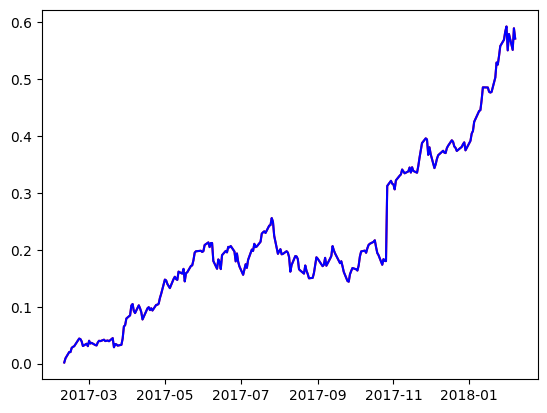

In [21]:
plt.plot(amzn_future['Cum_Ret'],color='red') 
plt.plot(amzn_future['Cum_Strategy'],color='blue')

In [22]:
# from sklearn.svm import SVC
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn import svm, datasets

# iris = datasets.load_iris()
# # Select 2 features / variable for the 2D plot that we are going to create.
# X = iris.data[:, :2]  # we only take the first two features.
# y = iris.target

# print(type(X))

# print(type(X_train))

In [23]:
# Try plotting the decision boundary, this takes a long time
# From here: https://stackoverflow.com/questions/51297423/plot-scikit-learn-sklearn-svm-decision-boundary-surface

# def make_meshgrid(x, y, h=.02):
#     x_min, x_max = x.min() - 1, x.max() + 1
#     y_min, y_max = y.min() - 1, y.max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     return xx, yy

# def plot_contours(ax, clf, xx, yy, **params):
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     out = ax.contourf(xx, yy, Z, **params)
#     return out

# fig, ax = plt.subplots()
# # title for the plots
# title = ('Decsion boundary of rbf SVM for Open-Close and High-Low features ')

# # Get Y
# y = y_train

# # Set-up grid for plotting.
# X0, X1 = X_train['Open-Close'].to_numpy(), X_train['High-Low'].to_numpy()
# xx, yy = make_meshgrid(X0, X1)

# plot_contours(ax, cls, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
# ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# ax.set_ylabel('High-Low')
# ax.set_xlabel('Open-Close')
# ax.set_xticks(())
# ax.set_yticks(())
# ax.set_title(title)
# ax.legend()
# plt.show()

Modeling  AMZN
            Open-Close  High-Low  Close14-Close1
date                                            
2013-03-01       -2.47     5.560            2.32
2013-03-04       -7.75     9.160            8.53
2013-03-05       -1.59     6.690           14.41
2013-03-06        1.97     4.657            6.12
2013-03-07        0.22     2.950            4.55
...                ...       ...             ...
2018-02-01       55.00    74.740          174.21
2018-02-02       47.44    84.000           84.80
2018-02-05       12.62   138.260          125.09
2018-02-06      -81.38    92.200           95.00
2018-02-07       32.22    45.840          149.52

[1245 rows x 3 columns]
Test accuracy: 0.5542168674698795
Train accuracy: 0.5331325301204819
              open      high       low   close   volume Ticks  Close14-Close1  \
date                                                                            
2017-02-13  831.62  842.9999  828.5500  836.53  4172618  AMZN            5.02   
2017-02-14 

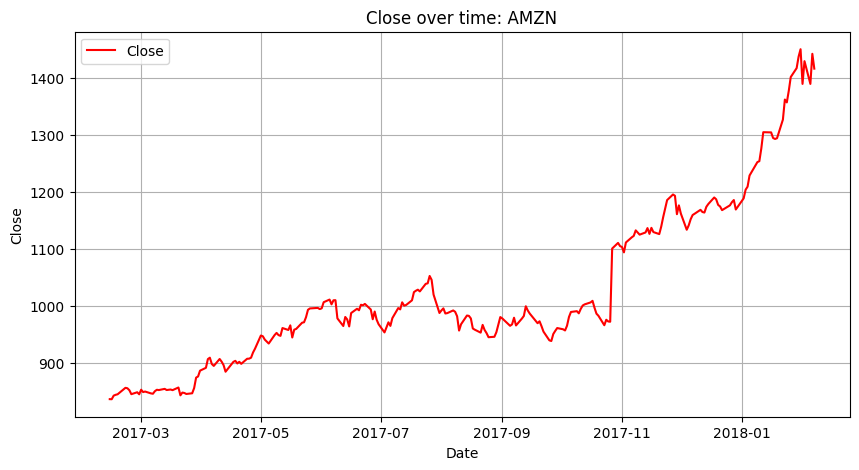

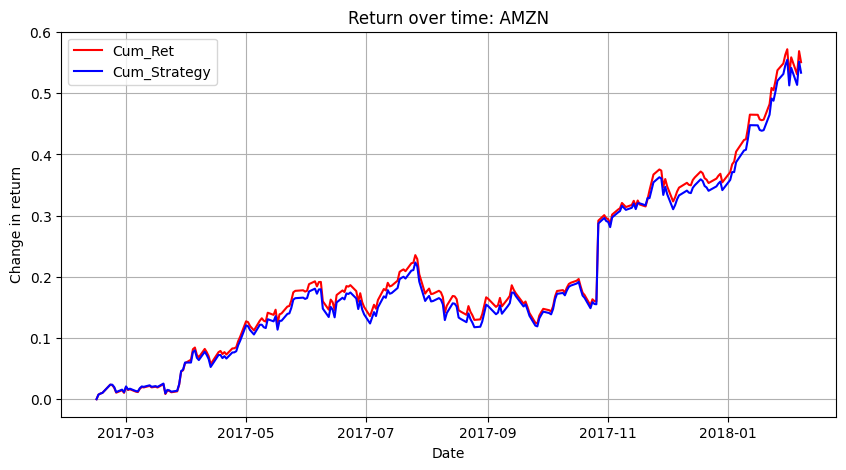

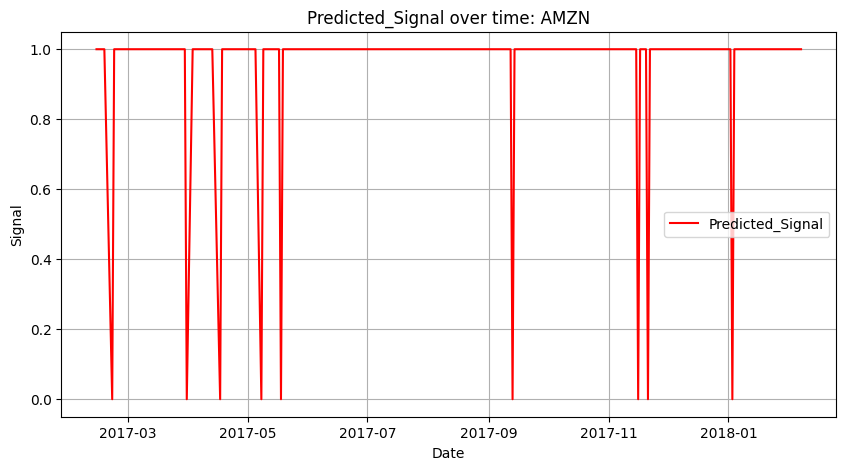

Modeling  AAPL
            Open-Close  High-Low  Close14-Close1
date                                            
2013-03-01      1.0757    1.1714         -4.7971
2013-03-04      1.1071    1.3143         -7.0657
2013-03-05     -1.3805    2.0628         -6.8357
2013-03-06      1.2640    1.5457         -5.1237
2013-03-07     -0.8689    1.5643         -5.8468
...                ...       ...             ...
2018-02-01     -0.6150    1.8600         -7.8500
2018-02-02      5.5000    6.7000         -9.3100
2018-02-05      2.6100    7.8800        -15.6900
2018-02-06     -8.2000    9.7200        -22.6100
2018-02-07      3.5450    4.3315        -16.2300

[1245 rows x 3 columns]
Test accuracy: 0.5180722891566265
Train accuracy: 0.5391566265060241
              open    high       low    close    volume Ticks  Close14-Close1  \
date                                                                            
2017-02-13  133.08  133.82  132.7500  133.290  23035421  AAPL          12.150   
2017-02-14 

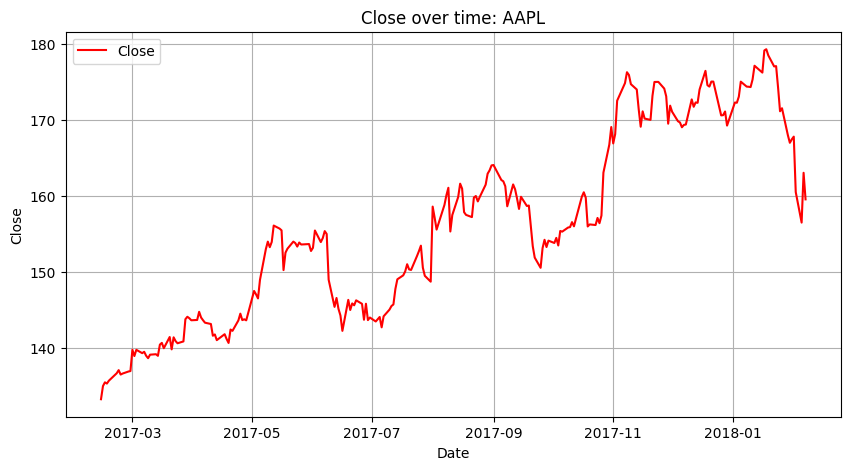

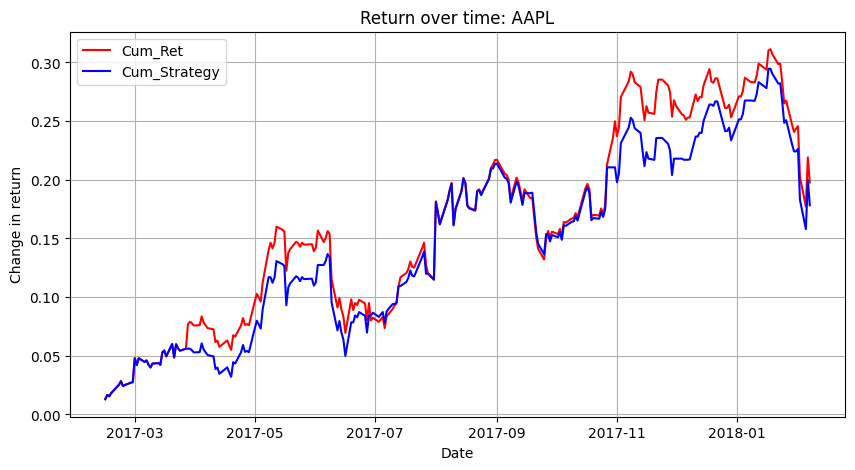

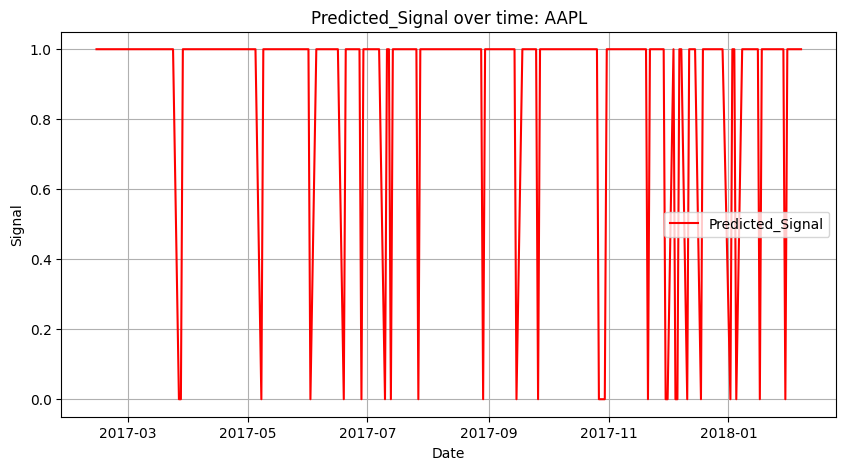

Modeling  MSFT
            Open-Close  High-Low  Close14-Close1
date                                            
2013-03-01       -0.23    0.4600            0.25
2013-03-04       -0.30    0.4500            0.09
2013-03-05       -0.06    0.3800            0.27
2013-03-06        0.12    0.4500            0.32
2013-03-07       -0.03    0.2750            0.05
...                ...       ...             ...
2018-02-01        0.53    2.4887            6.93
2018-02-02        1.86    2.4700            4.66
2018-02-05        2.56    5.2400            3.43
2018-02-06       -4.44    6.2250           -2.14
2018-02-07        0.88    2.5700            1.23

[1245 rows x 3 columns]
Test accuracy: 0.5180722891566265
Train accuracy: 0.5622489959839357
             open   high     low  close    volume Ticks  Close14-Close1  \
date                                                                      
2017-02-13  64.24  64.86  64.130  64.72  22920101  MSFT            0.48   
2017-02-14  64.41  64.72  64.

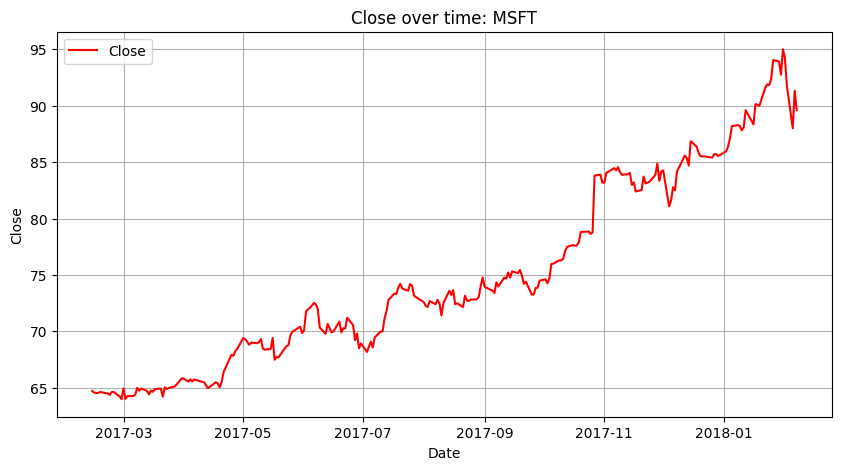

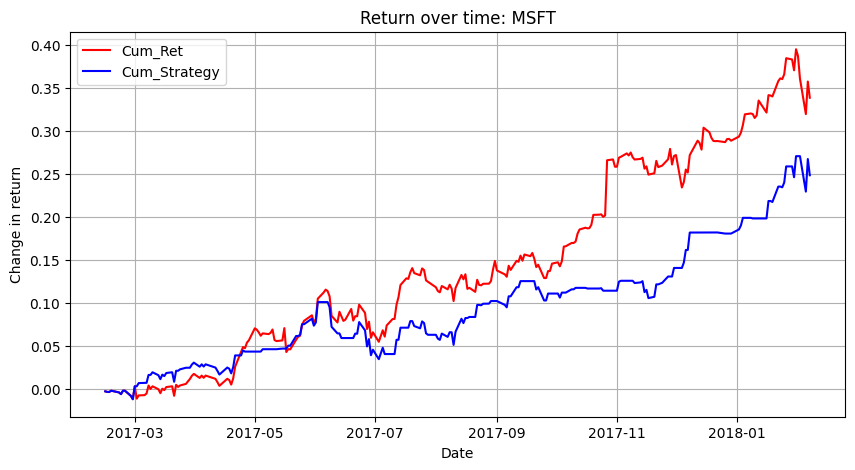

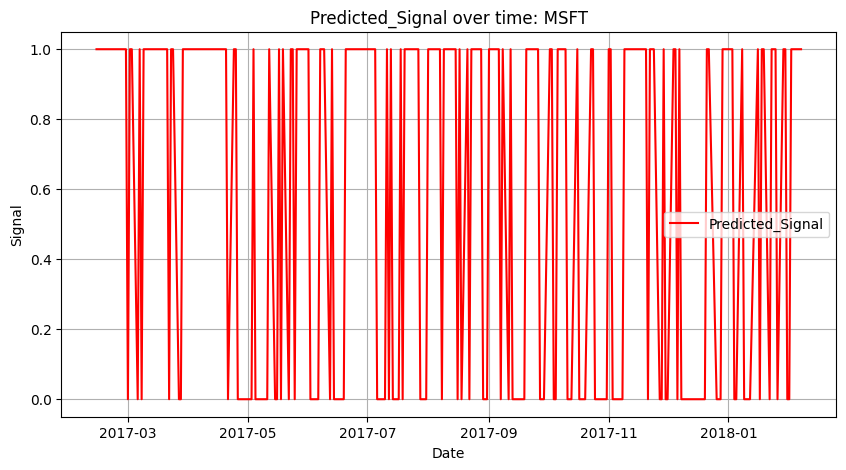

Modeling  WMT
            Open-Close  High-Low  Close14-Close1
date                                            
2013-03-01     -0.9600    1.1200           -0.70
2013-03-04     -1.7400    1.7500            0.34
2013-03-05     -0.2500    1.0500            1.86
2013-03-06      0.3700    0.8785            2.33
2013-03-07      0.1699    0.4100            2.56
...                ...       ...             ...
2018-02-01      0.4400    1.3800            6.58
2018-02-02      0.6700    2.3200            4.65
2018-02-05      3.3100    7.5200            3.79
2018-02-06     -3.2600    3.8300           -2.61
2018-02-07     -2.3500    4.5800           -3.40

[1245 rows x 3 columns]
Test accuracy: 0.4899598393574297
Train accuracy: 0.5431726907630522
             open    high     low  close    volume Ticks  Close14-Close1  \
date                                                                       
2017-02-13  68.32  68.650  67.560  67.77   8374307   WMT            0.62   
2017-02-14  67.88  68.680  

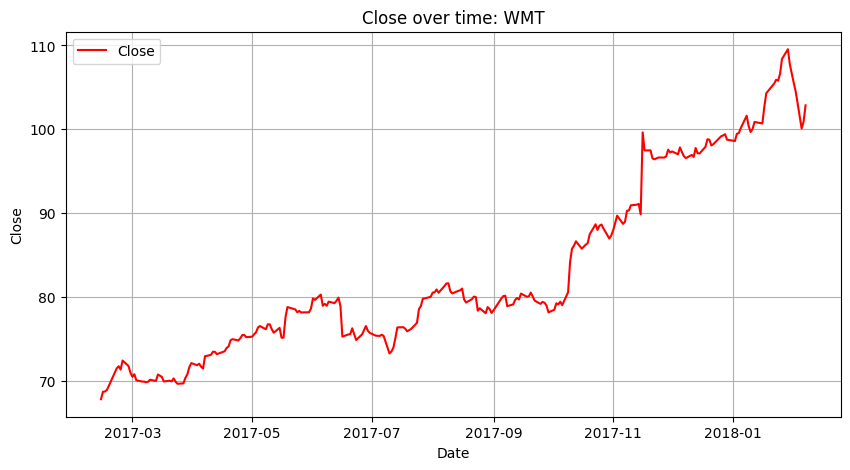

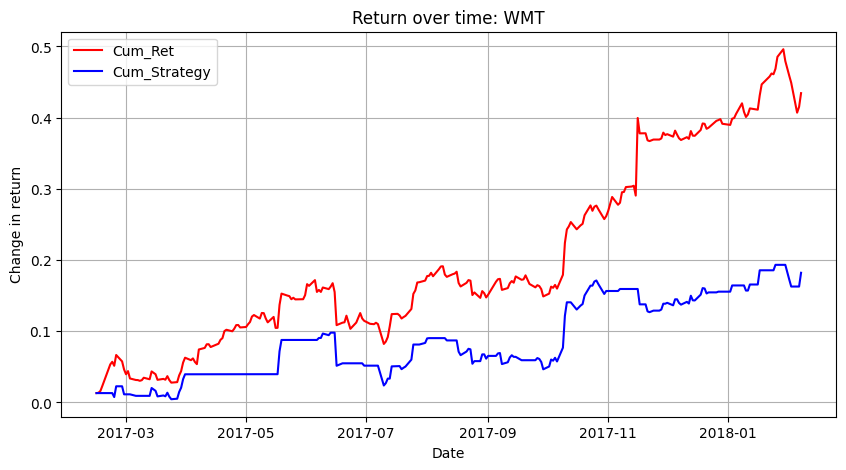

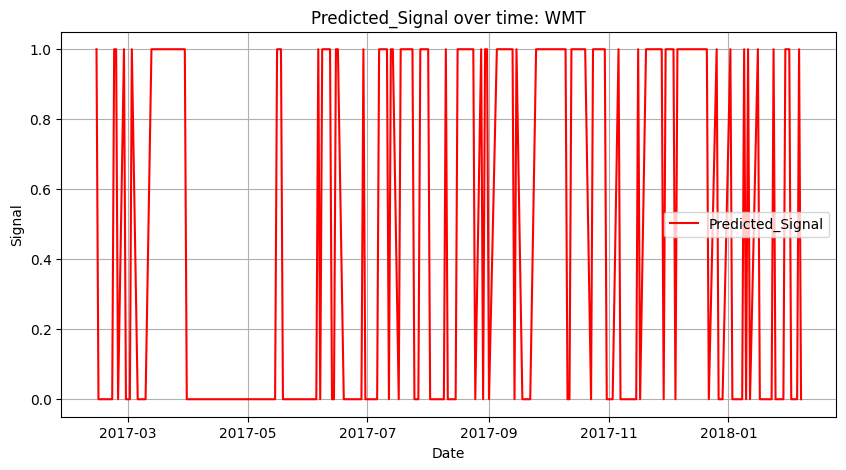

Modeling  V
            Open-Close  High-Low  Close14-Close1
date                                            
2013-03-01     -0.0375    0.5525          0.2100
2013-03-04     -0.4350    0.4975          0.4375
2013-03-05     -0.0500    0.4800          0.6750
2013-03-06     -0.0500    0.3750          1.3800
2013-03-07      0.0900    0.5325          1.2700
...                ...       ...             ...
2018-02-01     -0.9800    2.1600          4.3900
2018-02-02      2.8100    3.0200          5.6300
2018-02-05      2.4300    6.1200          0.5200
2018-02-06     -4.7700    7.0500         -5.7100
2018-02-07      0.4400    3.2500         -3.1400

[1245 rows x 3 columns]
Test accuracy: 0.5742971887550201
Train accuracy: 0.5612449799196787
             open   high      low  close   volume Ticks  Close14-Close1  \
date                                                                      
2017-02-13  86.20  86.70  86.0000  86.44  6046310     V            2.67   
2017-02-14  86.52  86.97  86.260

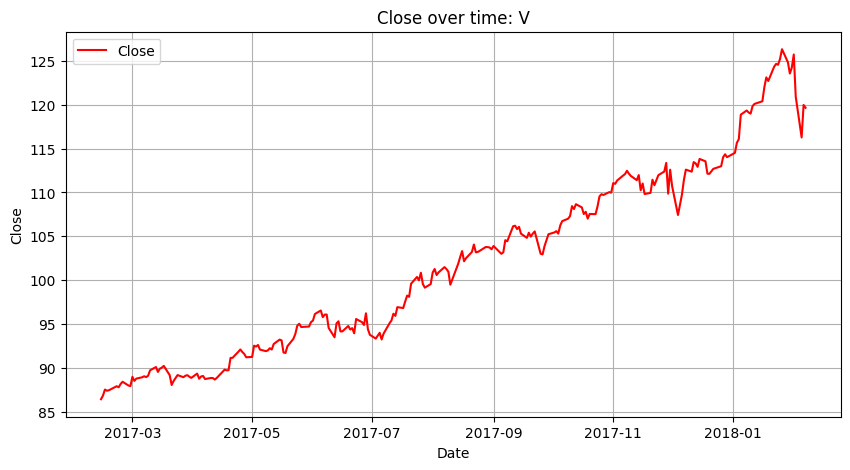

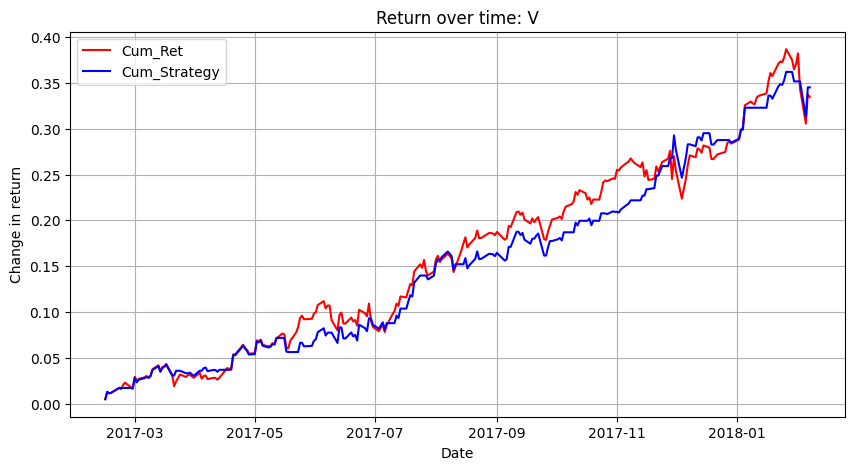

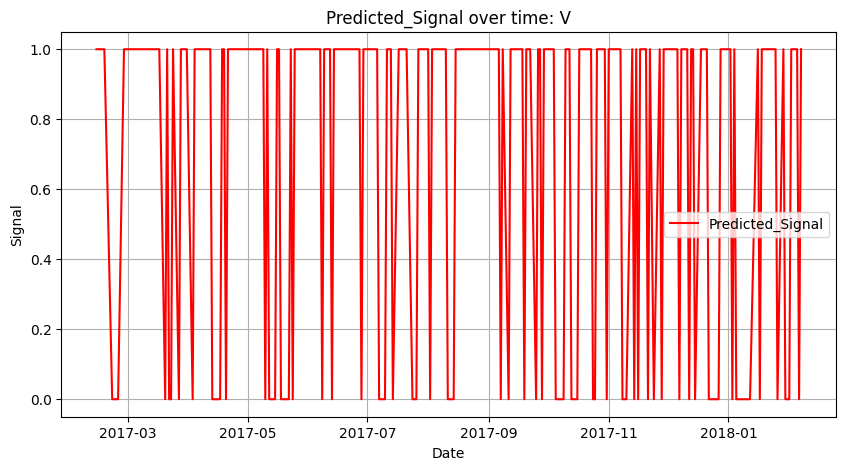

Modeling  MA
            Open-Close  High-Low  Close14-Close1
date                                            
2013-03-01      -0.330    0.6220          -0.665
2013-03-04      -0.543    0.6647          -0.255
2013-03-05      -0.457    0.8930           0.177
2013-03-06      -0.206    0.7880           0.789
2013-03-07       0.105    0.4305           0.542
...                ...       ...             ...
2018-02-01      -0.420    5.7150           8.080
2018-02-02       1.350    6.6900          10.600
2018-02-05       2.780    7.9500           8.260
2018-02-06      -8.780   12.5600           0.270
2018-02-07       0.270    5.1600           3.800

[1245 rows x 3 columns]
Test accuracy: 0.5783132530120482
Train accuracy: 0.5692771084337349
              open    high      low   close   volume Ticks  Close14-Close1  \
date                                                                         
2017-02-13  107.70  108.33  107.540  108.28  2337277    MA           -2.65   
2017-02-14  108.01  10

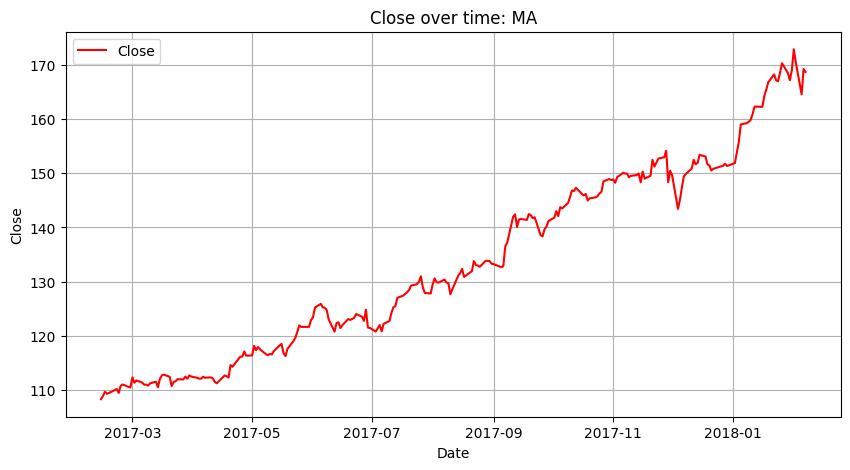

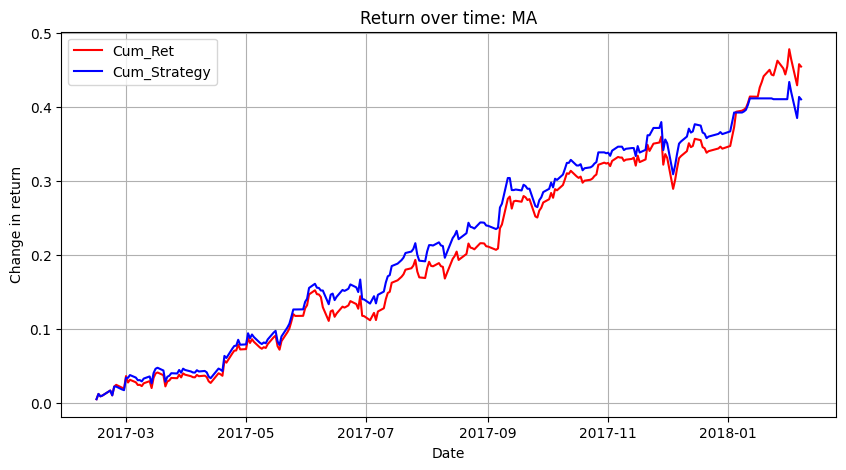

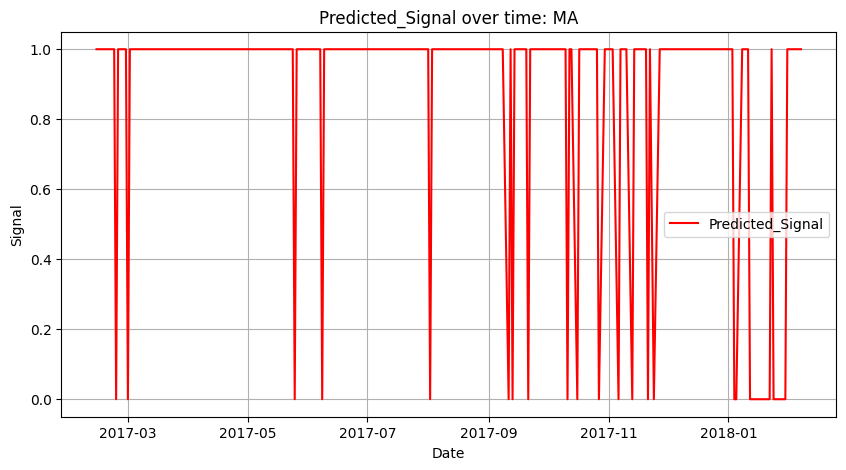

Modeling  COST
            Open-Close  High-Low  Close14-Close1
date                                            
2013-03-01       -0.60     1.390           -1.50
2013-03-04       -2.17     2.300           -0.57
2013-03-05        0.53     1.130            1.67
2013-03-06        0.59     1.130            1.52
2013-03-07        1.58     2.080            0.54
...                ...       ...             ...
2018-02-01       -0.06     2.960            5.49
2018-02-02        0.26     2.800            1.63
2018-02-05        7.89     9.575           -0.54
2018-02-06       -6.10     9.040           -9.52
2018-02-07        1.41     3.120           -6.50

[1245 rows x 3 columns]
Test accuracy: 0.5421686746987951
Train accuracy: 0.5582329317269076
              open    high       low   close   volume Ticks  Close14-Close1  \
date                                                                          
2017-02-13  172.49  172.49  170.7800  171.96  2272213  COST            8.33   
2017-02-14  171.6

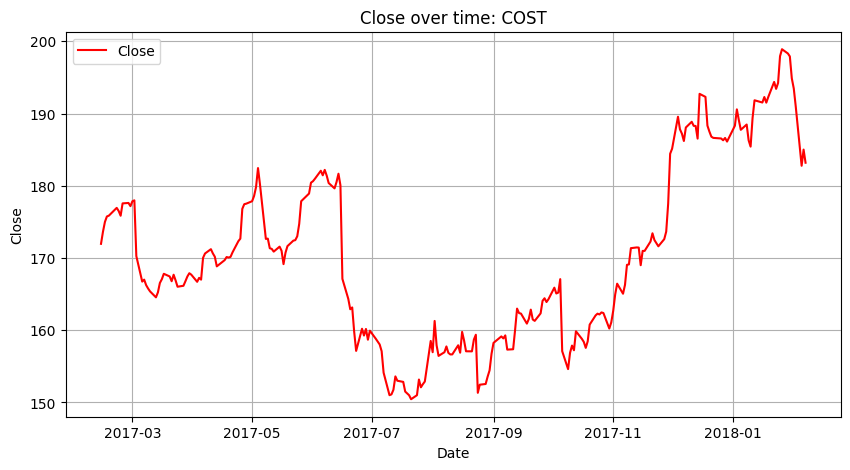

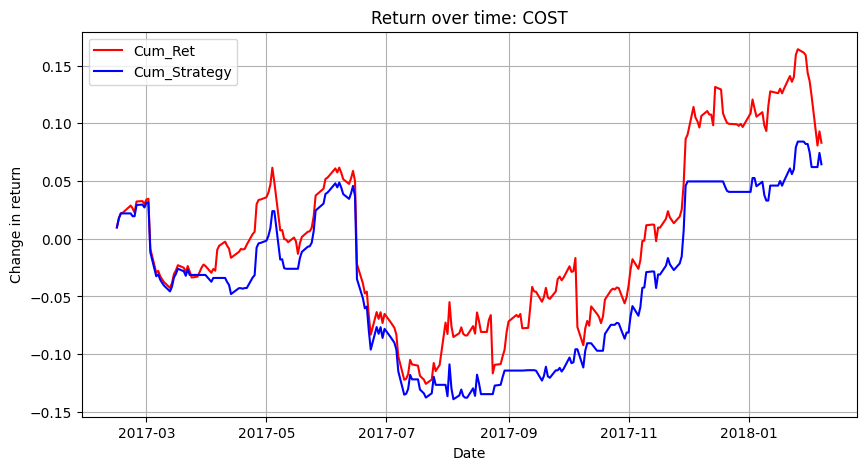

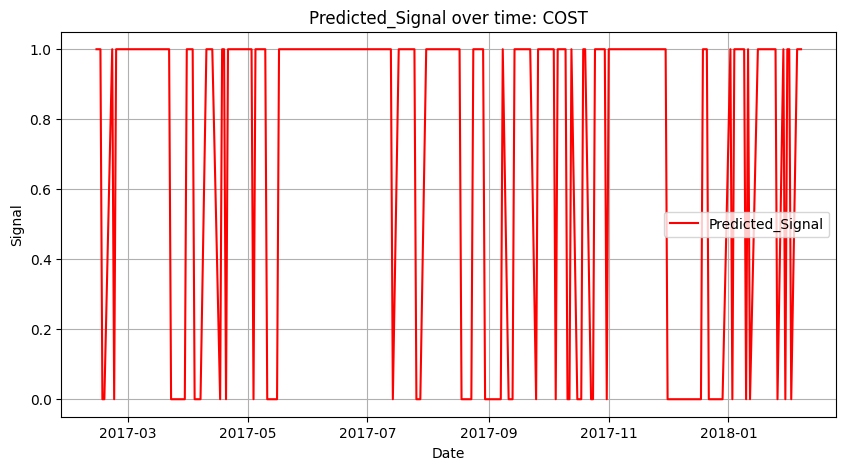

Modeling  PEP
            Open-Close  High-Low  Close14-Close1
date                                            
2013-03-01       -0.38    0.5800            3.17
2013-03-04       -0.82    1.0800            3.57
2013-03-05       -0.06    0.5800            4.43
2013-03-06        0.20    0.4700            5.40
2013-03-07       -0.38    0.5000            4.52
...                ...       ...             ...
2018-02-01       -0.38    1.7300            3.42
2018-02-02        1.24    1.8800            2.92
2018-02-05        4.11    5.2499            0.81
2018-02-06       -1.12    3.8000           -4.72
2018-02-07        0.47    3.0200           -5.49

[1245 rows x 3 columns]
Test accuracy: 0.5140562248995983
Train accuracy: 0.5863453815261044
              open    high     low   close   volume Ticks  Close14-Close1  \
date                                                                        
2017-02-13  106.50  106.69  105.88  106.52  3464318   PEP            1.39   
2017-02-14  106.17  107.

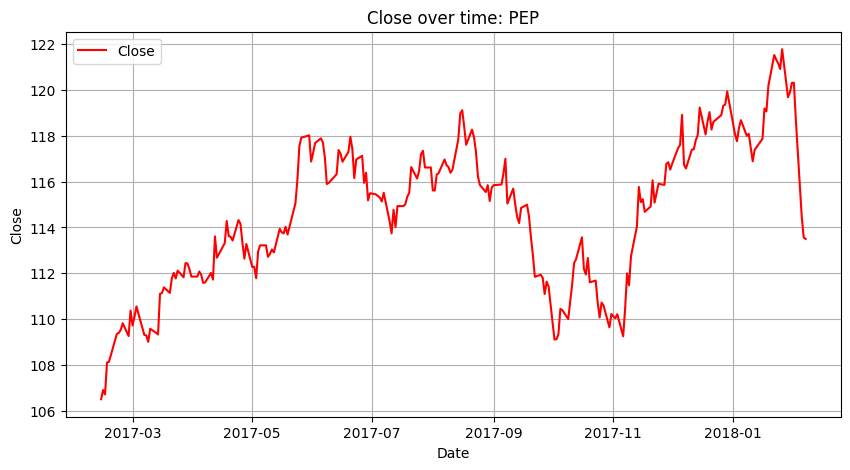

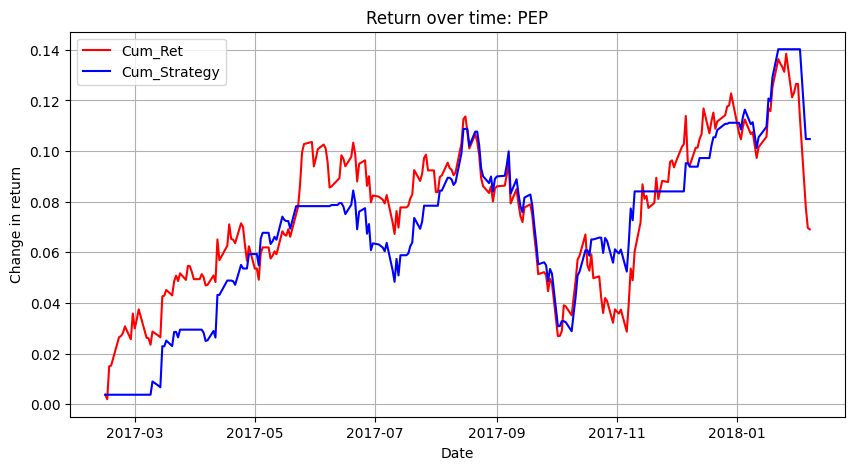

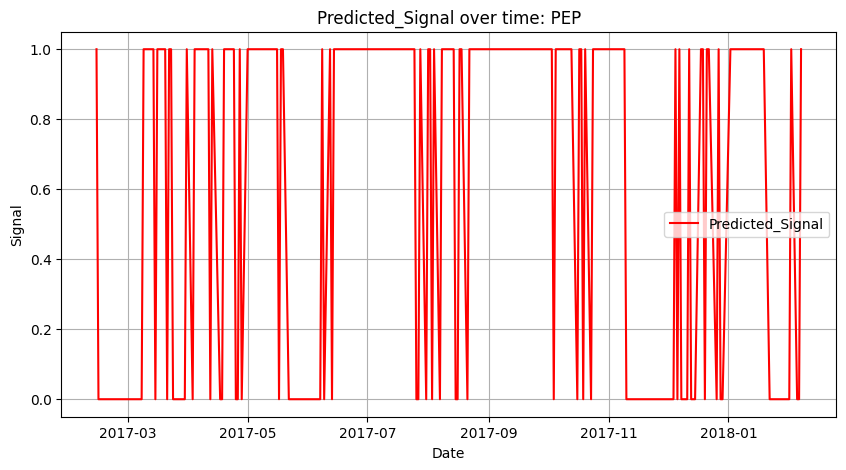

Modeling  CAT
            Open-Close  High-Low  Close14-Close1
date                                            
2013-03-01        0.18    1.8300           -4.48
2013-03-04        0.86    1.5600           -5.24
2013-03-05        0.28    1.2862           -7.47
2013-03-06        1.33    1.6400           -6.17
2013-03-07        0.25    1.1300           -6.43
...                ...       ...             ...
2018-02-01       -1.00    3.5600           -6.42
2018-02-02        3.28    4.2700           -8.06
2018-02-05        3.85   16.0800          -11.82
2018-02-06       -8.34    9.7499          -17.42
2018-02-07        1.02    3.8100          -12.42

[1245 rows x 3 columns]
Test accuracy: 0.42570281124497994
Train accuracy: 0.5321285140562249
             open    high    low  close   volume Ticks  Close14-Close1  \
date                                                                     
2017-02-13  97.69  99.045  97.16  98.50  6995085   CAT            0.07   
2017-02-14  98.29  98.740  97.26

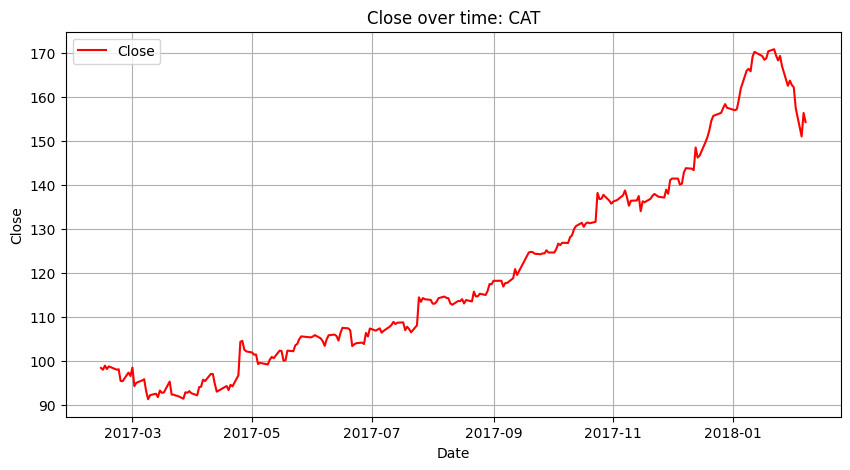

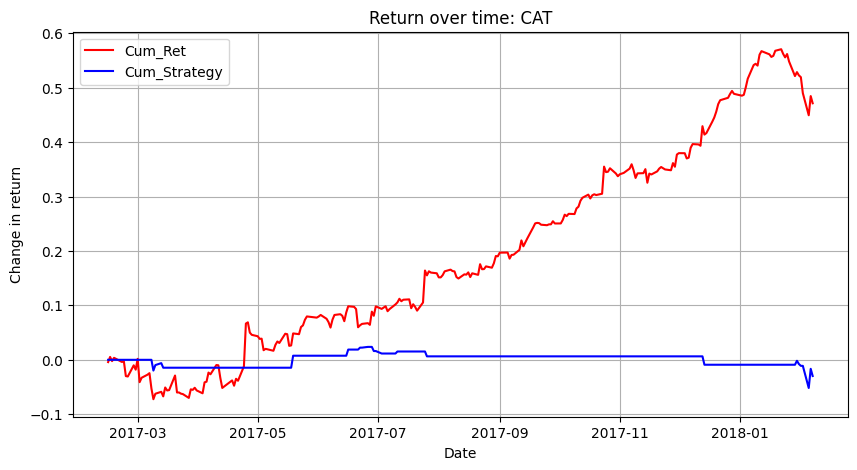

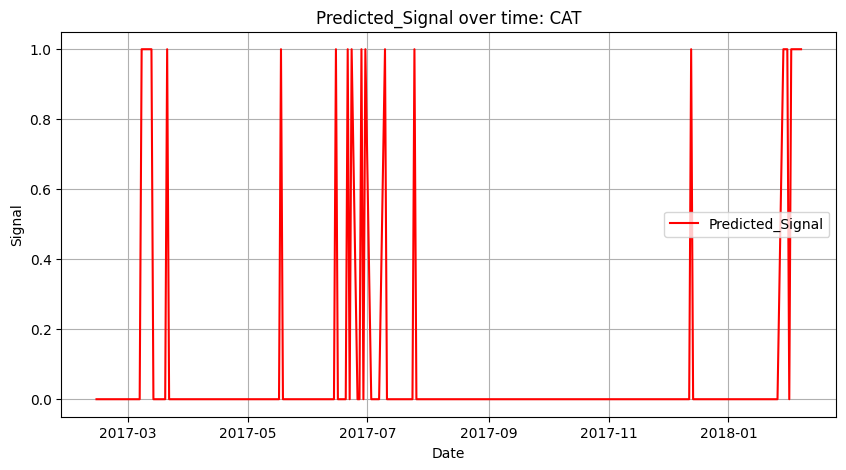

Modeling  WM
            Open-Close  High-Low  Close14-Close1
date                                            
2013-03-01        0.28    0.5300            1.02
2013-03-04       -0.28    0.5300            0.59
2013-03-05       -0.18    0.3445            0.74
2013-03-06        0.37    0.4800            0.86
2013-03-07        0.11    0.4700            0.09
...                ...       ...             ...
2018-02-01        0.62    1.2200            0.25
2018-02-02        0.73    1.5500           -0.42
2018-02-05        4.35    4.7200           -1.63
2018-02-06       -0.89    4.0990           -6.78
2018-02-07        0.15    1.8400           -6.16

[1245 rows x 3 columns]
Test accuracy: 0.5823293172690763
Train accuracy: 0.5371485943775101
             open   high    low  close   volume Ticks  Close14-Close1  \
date                                                                    
2017-02-13  70.59  70.99  70.51  70.84  1548833    WM            0.98   
2017-02-14  70.79  71.05  70.72  70.8

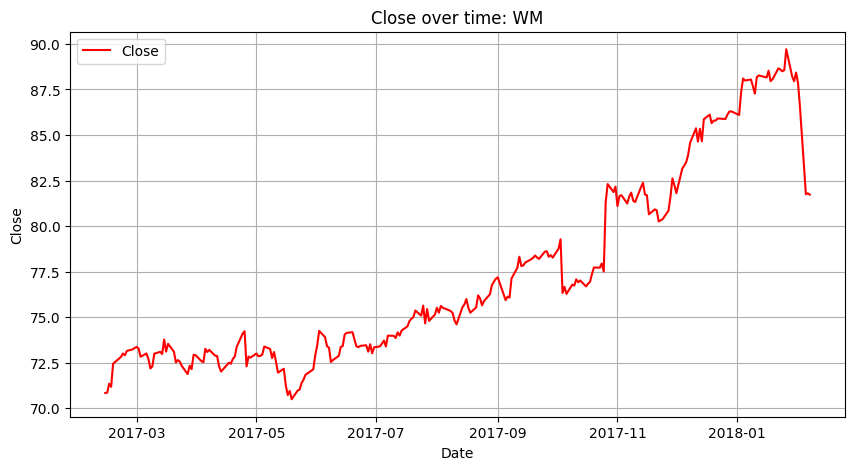

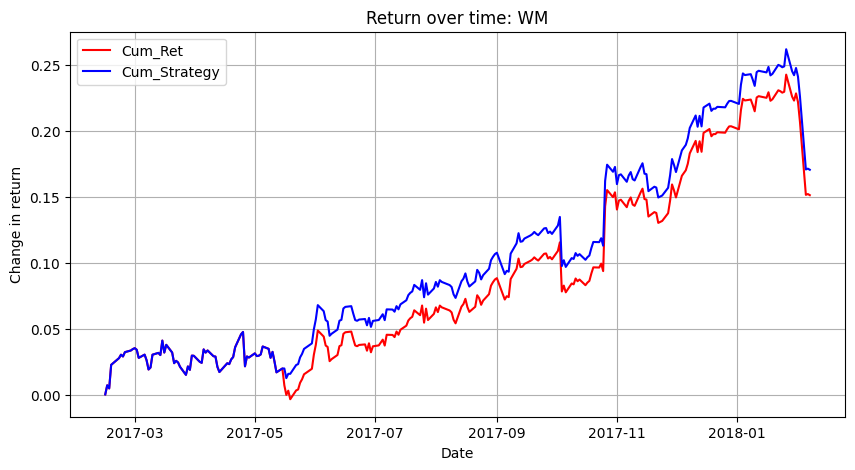

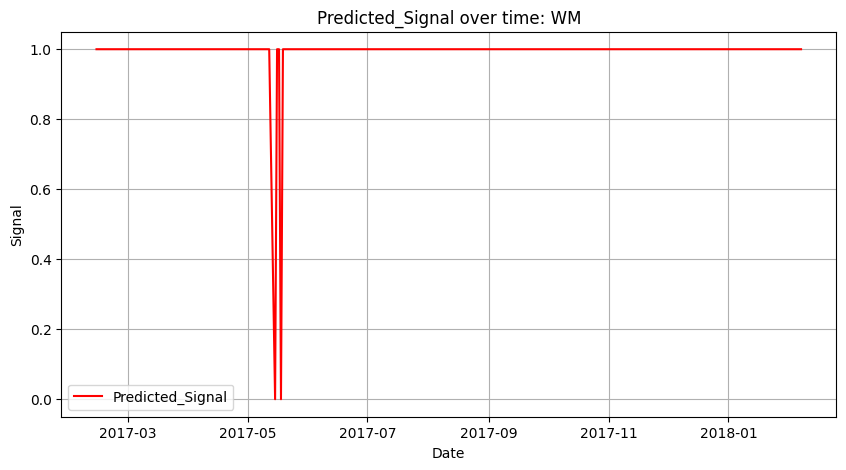

Modeling  ITW
            Open-Close  High-Low  Close14-Close1
date                                            
2013-03-01       -0.44    1.5700           -1.22
2013-03-04       -0.20    1.0200           -1.20
2013-03-05       -0.30    0.7500           -1.48
2013-03-06       -0.05    0.7200           -1.25
2013-03-07        0.67    0.8300           -1.09
...                ...       ...             ...
2018-02-01       -0.48    2.9199            4.67
2018-02-02        1.53    3.4000            2.56
2018-02-05        8.41   10.8700            1.16
2018-02-06       -5.93    8.7390           -9.90
2018-02-07        0.21    4.5300           -6.18

[1245 rows x 3 columns]
Test accuracy: 0.5742971887550201
Train accuracy: 0.5431726907630522
              open     high     low   close   volume Ticks  Close14-Close1  \
date                                                                         
2017-02-13  128.34  129.640  128.34  129.37   897696   ITW            0.94   
2017-02-14  129.30  1

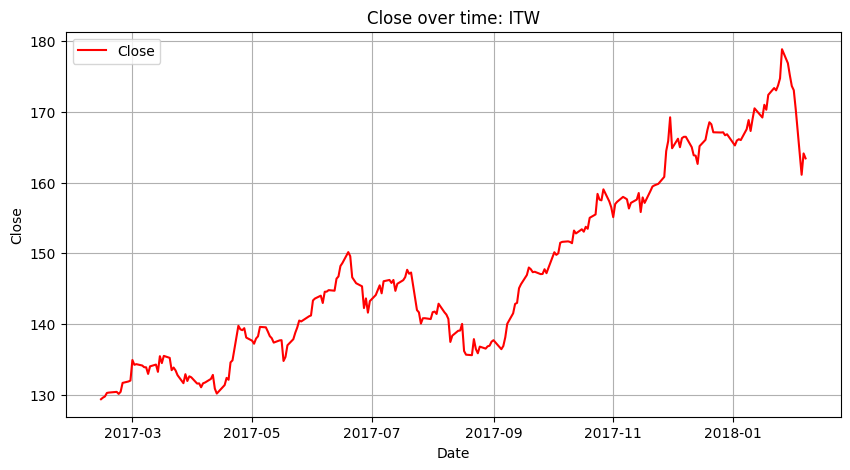

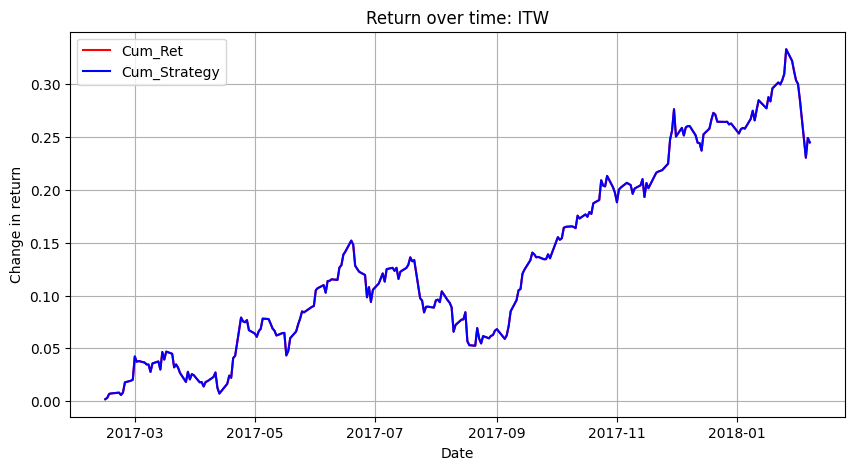

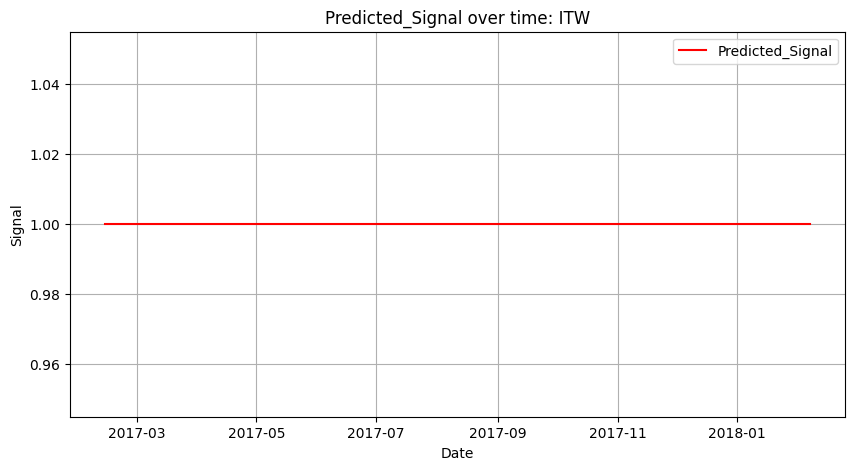

In [24]:
# Try this by looping through multiple stock symbols

# Either pick a few stocks to try
tick_names = ['AMZN', 'AAPL', 'MSFT', 'WMT', 'V', 'MA', 'COST', 'PEP', 'CAT', 'WM', 'ITW']

# OR do it for all stocks
#tick_names = unique_values

# Train a model for each stock
for name in tick_names:
    print("Modeling ", name)
    stock = df.loc[df['Ticks'] == name]
    stock.index = pd.to_datetime(stock['date']) 


    # TODO we can also try other features here!!!
    # Try comparing ranges of close values?
    stock['Close14-Close1'] = stock['close'].shift(1) - stock['close'].shift(14)
    
    stock = stock.drop(['date'], axis='columns') 
    stock['Open-Close'] = stock['open'] - stock['close']
    stock['High-Low'] = stock['high'] - stock['low']

    # TODO due to the 14 day feature above, I drop the nan rows (first 14 days)
    stock.dropna(inplace=True)
      
    # Store all predictor variables in a variable X 
    X = stock[['Open-Close', 'High-Low', 'Close14-Close1']] 
    print(X)
    y = np.where(stock['close'].shift(-1) > stock['close'], 1, 0) 
    split_percentage = 0.8
    split = int(split_percentage*len(stock)) 
      
    # Train data set 
    X_train = X[:split] 
    y_train = y[:split] 
      
    # Test data set 
    X_test = X[split:] 
    y_test = y[split:]

    svm = SVC()
    cls = svm.fit(X_train, y_train)
    
    y_pred = cls.predict(X_test)
    y_pred_train = cls.predict(X_train)

    accuracy = accuracy_score(y_test, y_pred)
    print("Test accuracy:", accuracy)
    
    accuracy = accuracy_score(y_train, y_pred_train)
    print("Train accuracy:", accuracy)

    # Only show the returns of the test period:

    stock_future = stock[split:]

    stock_future['Predicted_Signal'] = cls.predict(X_test)
    stock_future['Return'] = stock_future['close'].pct_change()
    stock_future['Strategy_Return'] = stock_future.Return * stock_future.Predicted_Signal.shift(1)
    stock_future['Cum_Ret'] = stock_future['Return'].cumsum() 
    stock_future['Cum_Strategy'] = stock_future['Strategy_Return'].cumsum() 

    print(stock_future.head())

    plt.figure(figsize=(10, 5))
    plt.plot(stock_future['close'],color='red', label="Close") 
    plt.title('Close over time: ' + name, )
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(stock_future['Cum_Ret'],color='red', label="Cum_Ret") 
    plt.plot(stock_future['Cum_Strategy'],color='blue', label="Cum_Strategy")
    plt.title('Return over time: ' + name, )
    plt.xlabel('Date')
    plt.ylabel('Change in return')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(stock_future['Predicted_Signal'],color='red', label="Predicted_Signal") 
    plt.title('Predicted_Signal over time: ' + name, )
    plt.xlabel('Date')
    plt.ylabel('Signal')
    plt.legend()
    plt.grid(True)
    plt.show()


    # # Plot the decision boundary surface, warning his takes a LONG time to run
    # fig, ax = plt.subplots()

    # title = ('Decsion boundary of rbf SVM for Open-Close and High-Low features: ' + name)
    # # Get Y
    # y = y_train
    
    # # Set-up grid for plotting.
    # X0, X1 = X_train['Open-Close'].to_numpy(), X_train['High-Low'].to_numpy()
    # xx, yy = make_meshgrid(X0, X1)
    
    # plot_contours(ax, cls, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    # ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    # ax.set_ylabel('High-Low')
    # ax.set_xlabel('Open-Close')
    # ax.set_xticks(())
    # ax.set_yticks(())
    # ax.set_title(title)
    # ax.legend()
    # plt.show()



Modeling  AMZN
            Open-Close  High-Low
date                            
2013-02-08       -0.55     4.695
2013-02-11        5.99     6.650
2013-02-12        0.49     3.160
2013-02-13       -7.94     9.660
2013-02-14       -1.87     5.250
...                ...       ...
2018-02-01       55.00    74.740
2018-02-02       47.44    84.000
2018-02-05       12.62   138.260
2018-02-06      -81.38    92.200
2018-02-07       32.22    45.840

[1259 rows x 2 columns]
Test accuracy: 0.5714285714285714
Train accuracy: 0.535253227408143
              open      high       low   close   volume Ticks  Open-Close  \
date                                                                        
2017-02-08  812.69  821.4790  812.5000  819.71  2857985  AMZN       -7.02   
2017-02-09  821.60  825.0000  819.7100  821.36  2484948  AMZN        0.24   
2017-02-10  823.82  828.0000  822.8500  827.46  2429609  AMZN       -3.64   
2017-02-13  831.62  842.9999  828.5500  836.53  4172618  AMZN       -4.91   
2

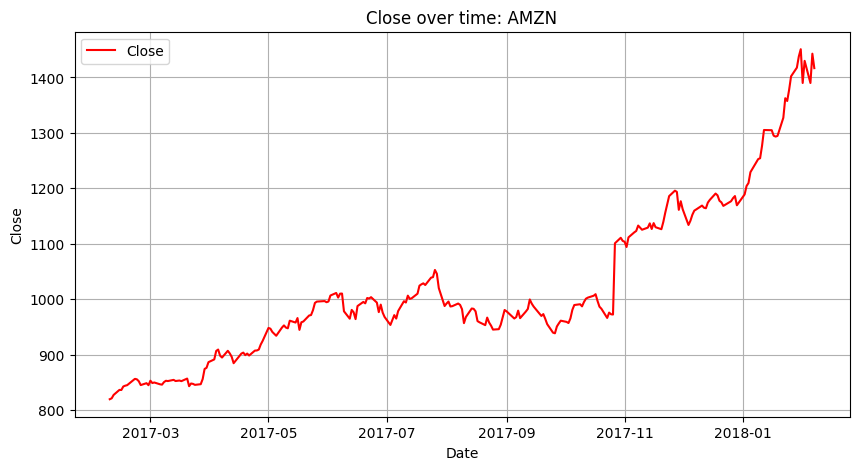

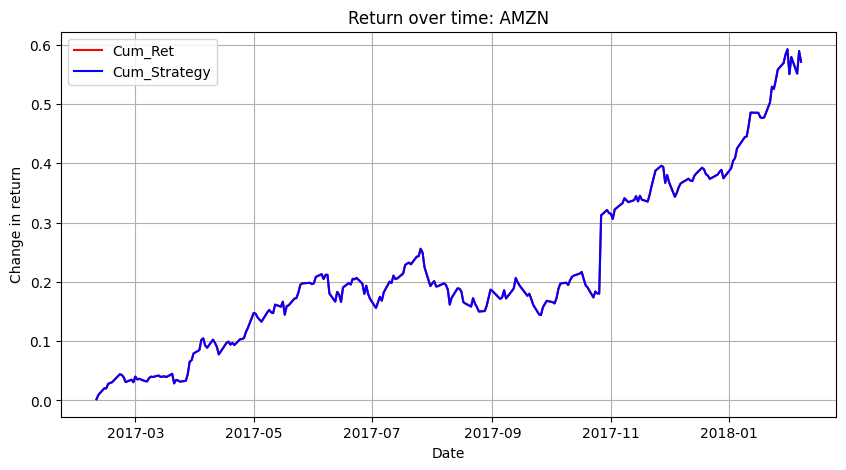

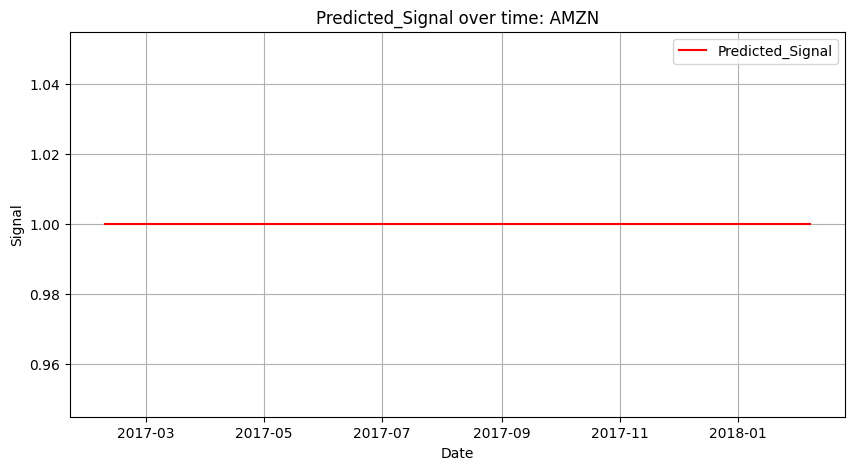

Modeling  AAPL
            Open-Close  High-Low
date                            
2013-02-08     -0.1400    1.5086
2013-02-11     -0.4900    1.6700
2013-02-12      1.6586    2.0909
2013-02-13      0.0286    1.4886
2013-02-14     -0.2957    1.0886
...                ...       ...
2018-02-01     -0.6150    1.8600
2018-02-02      5.5000    6.7000
2018-02-05      2.6100    7.8800
2018-02-06     -8.2000    9.7200
2018-02-07      3.5450    4.3315

[1259 rows x 2 columns]
Test accuracy: 0.5
Train accuracy: 0.5362462760675273
              open     high     low   close    volume Ticks  Open-Close  \
date                                                                      
2017-02-08  131.35  132.220  131.22  132.04  23004072  AAPL       -0.69   
2017-02-09  131.65  132.445  131.12  132.42  28349859  AAPL       -0.77   
2017-02-10  132.46  132.940  132.05  132.12  20065458  AAPL        0.34   
2017-02-13  133.08  133.820  132.75  133.29  23035421  AAPL       -0.21   
2017-02-14  133.47  135.090

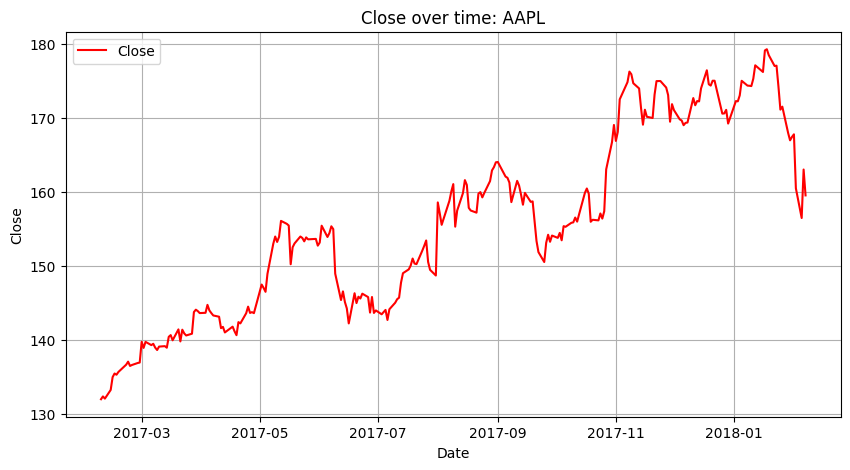

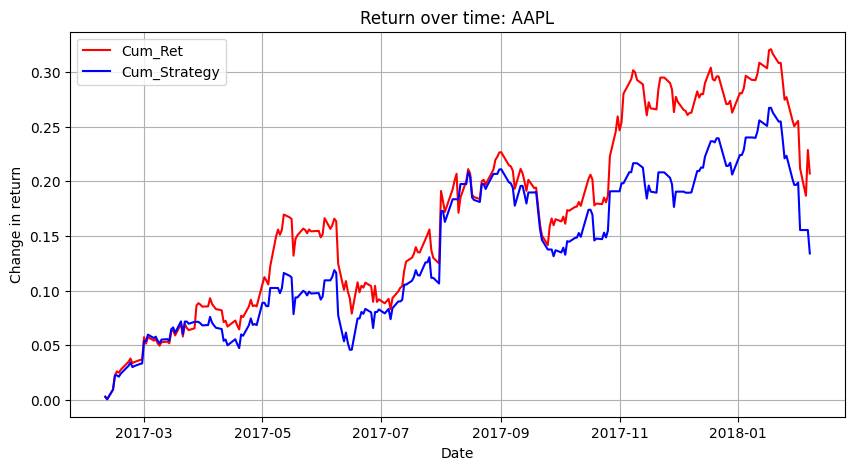

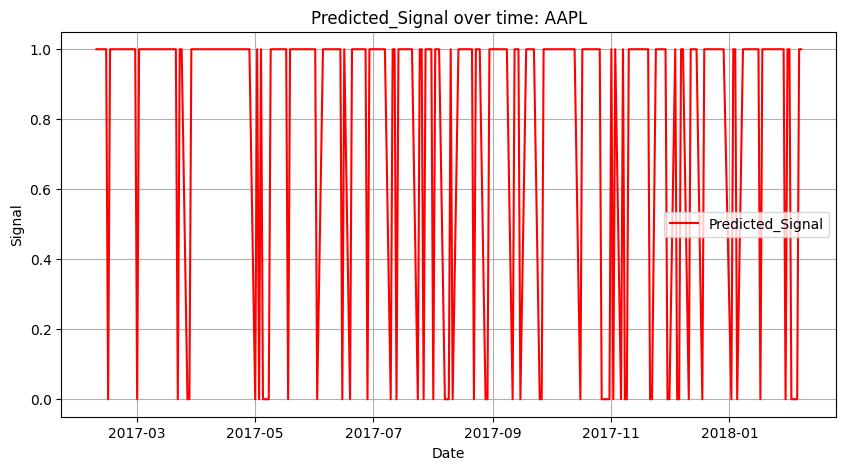

Modeling  MSFT
            Open-Close  High-Low
date                            
2013-02-08       -0.20    0.4000
2013-02-11       -0.21    0.4200
2013-02-12        0.00    0.2500
2013-02-13       -0.10    0.2300
2013-02-14       -0.12    0.1900
...                ...       ...
2018-02-01        0.53    2.4887
2018-02-02        1.86    2.4700
2018-02-05        2.56    5.2400
2018-02-06       -4.44    6.2250
2018-02-07        0.88    2.5700

[1259 rows x 2 columns]
Test accuracy: 0.5555555555555556
Train accuracy: 0.5441906653426017
             open    high     low  close    volume Ticks  Open-Close  \
date                                                                   
2017-02-08  63.57  63.810  63.220  63.34  18096358  MSFT        0.23   
2017-02-09  63.52  64.435  63.320  64.06  22644443  MSFT       -0.54   
2017-02-10  64.25  64.300  63.975  64.00  18170729  MSFT        0.25   
2017-02-13  64.24  64.860  64.130  64.72  22920101  MSFT       -0.48   
2017-02-14  64.41  64.720  64.

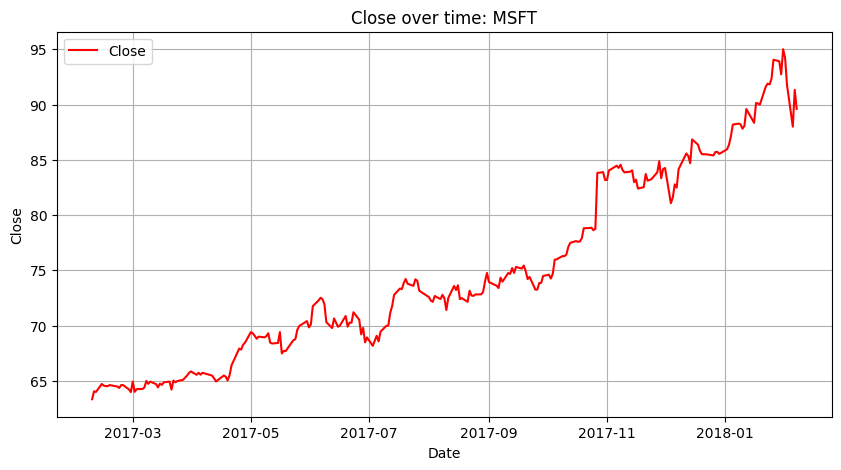

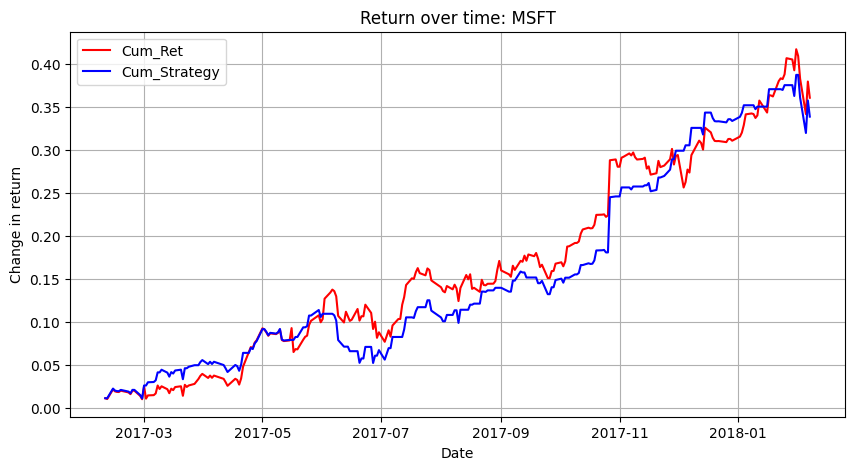

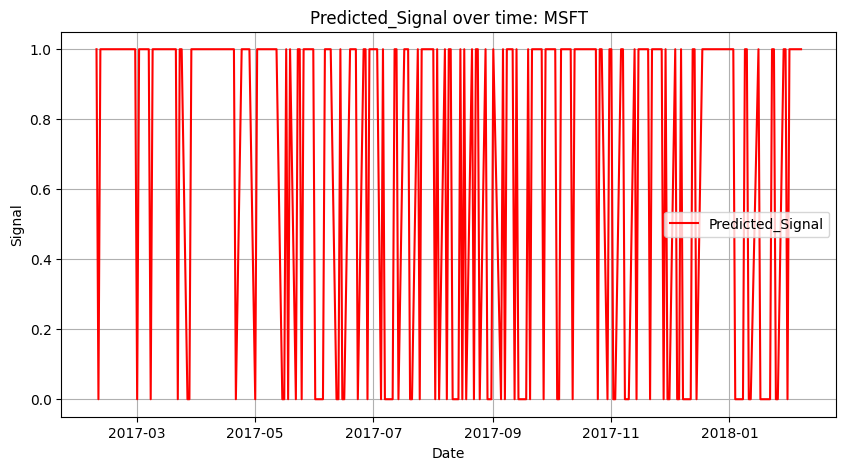

Modeling  WMT
            Open-Close  High-Low
date                            
2013-02-08       -0.28     0.570
2013-02-11       -0.15     0.980
2013-02-12        0.09     0.560
2013-02-13       -0.10     0.490
2013-02-14        0.28     0.475
...                ...       ...
2018-02-01        0.44     1.380
2018-02-02        0.67     2.320
2018-02-05        3.31     7.520
2018-02-06       -3.26     3.830
2018-02-07       -2.35     4.580

[1259 rows x 2 columns]
Test accuracy: 0.4880952380952381
Train accuracy: 0.5431976166832175
             open   high    low  close    volume Ticks  Open-Close  High-Low  \
date                                                                           
2017-02-08  66.89  67.82  66.89  67.81   7660755   WMT       -0.92      0.93   
2017-02-09  67.80  69.14  67.75  69.08  11080479   WMT       -1.28      1.39   
2017-02-10  68.25  68.60  67.76  68.02  12445633   WMT        0.23      0.84   
2017-02-13  68.32  68.65  67.56  67.77   8374307   WMT        0

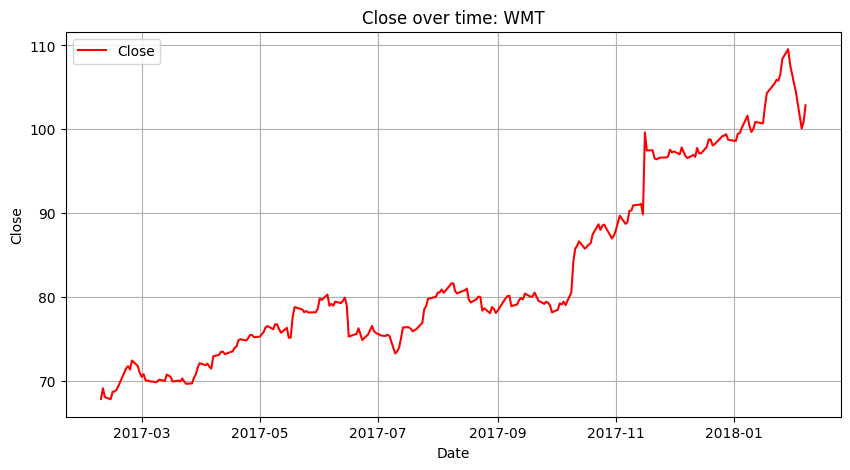

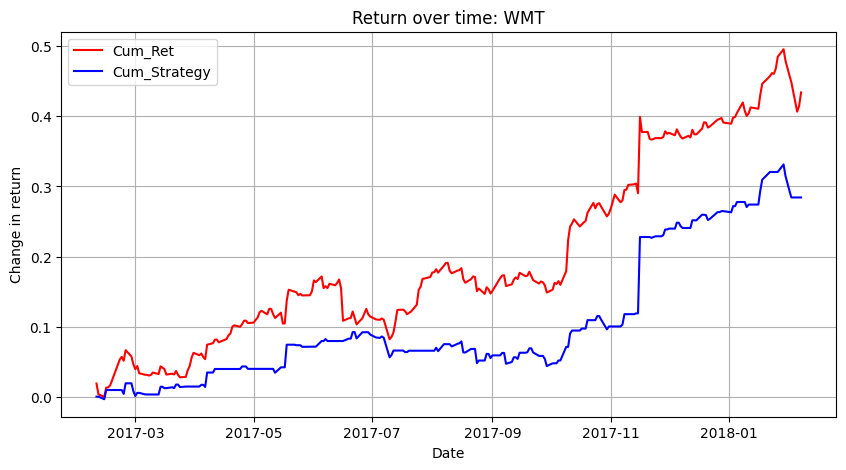

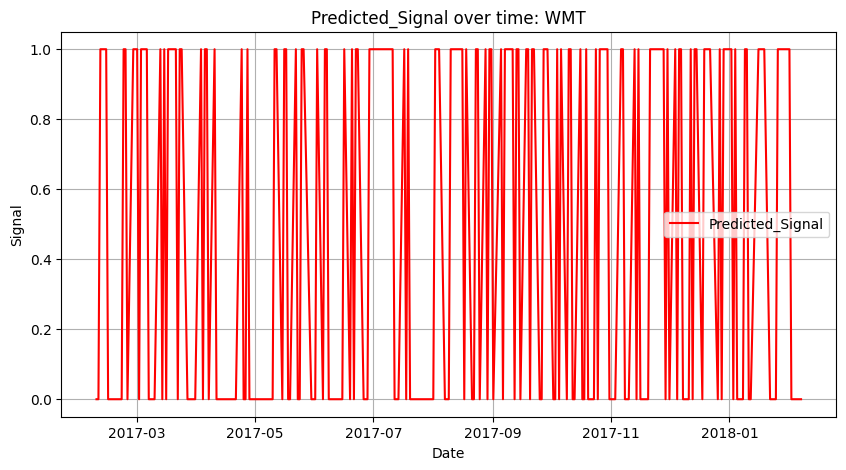

Modeling  V
            Open-Close  High-Low
date                            
2013-02-08     -0.1000    0.4600
2013-02-11      0.3125    0.5575
2013-02-12      0.0100    0.3200
2013-02-13      0.4200    0.8125
2013-02-14     -0.3450    0.5875
...                ...       ...
2018-02-01     -0.9800    2.1600
2018-02-02      2.8100    3.0200
2018-02-05      2.4300    6.1200
2018-02-06     -4.7700    7.0500
2018-02-07      0.4400    3.2500

[1259 rows x 2 columns]
Test accuracy: 0.5873015873015873
Train accuracy: 0.548162859980139
             open   high    low  close    volume Ticks  Open-Close  High-Low  \
date                                                                           
2017-02-08  85.80  85.84  85.08  85.09   7587713     V        0.71      0.76   
2017-02-09  85.37  85.77  84.88  85.58   6554731     V       -0.21      0.89   
2017-02-10  85.80  86.14  85.23  85.90  10431983     V       -0.10      0.91   
2017-02-13  86.20  86.70  86.00  86.44   6046310     V       -0.24

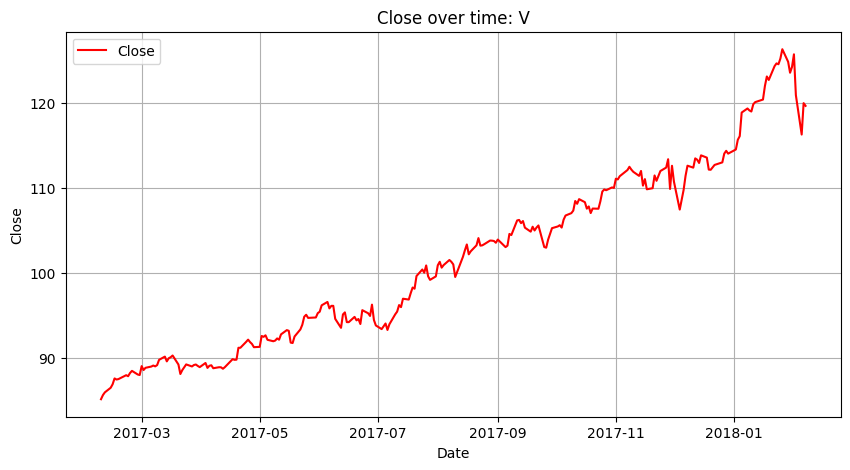

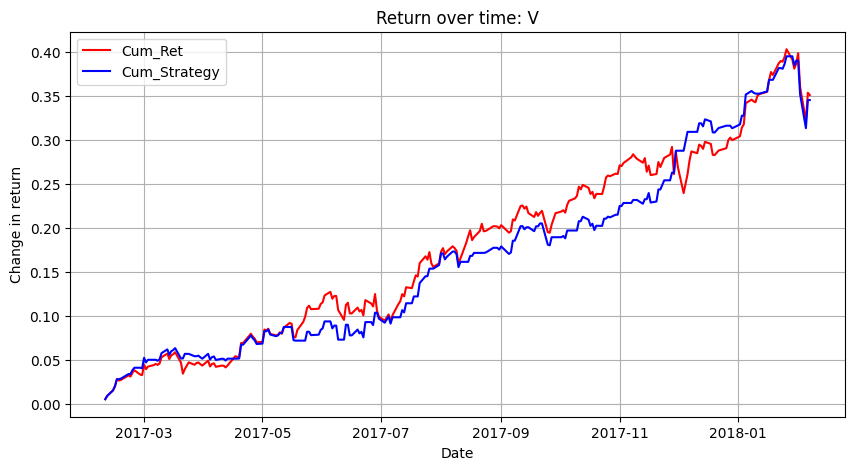

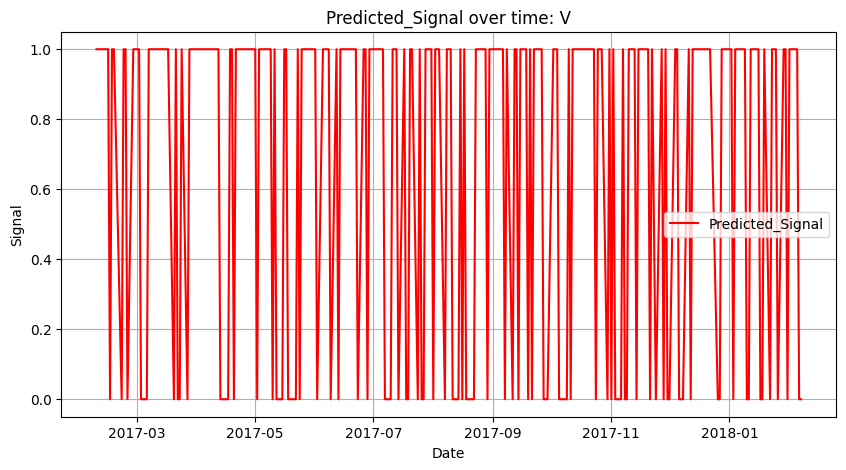

Modeling  MA
            Open-Close  High-Low
date                            
2013-02-08      -0.601    0.6160
2013-02-11       0.477    0.6925
2013-02-12       0.122    0.3620
2013-02-13       0.204    0.5720
2013-02-14      -0.601    0.7110
...                ...       ...
2018-02-01      -0.420    5.7150
2018-02-02       1.350    6.6900
2018-02-05       2.780    7.9500
2018-02-06      -8.780   12.5600
2018-02-07       0.270    5.1600

[1259 rows x 2 columns]
Test accuracy: 0.5912698412698413
Train accuracy: 0.5600794438927508
              open    high     low   close   volume Ticks  Open-Close  \
date                                                                    
2017-02-08  106.55  106.90  105.80  106.72  2993641    MA       -0.17   
2017-02-09  106.73  107.54  106.50  107.30  2679439    MA       -0.57   
2017-02-10  107.55  107.64  107.20  107.27  2078832    MA        0.28   
2017-02-13  107.70  108.33  107.54  108.28  2337277    MA       -0.58   
2017-02-14  108.01  109.21

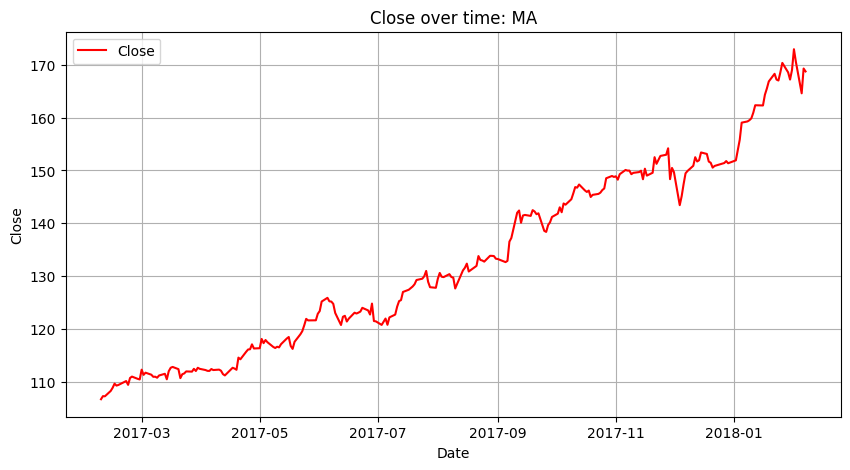

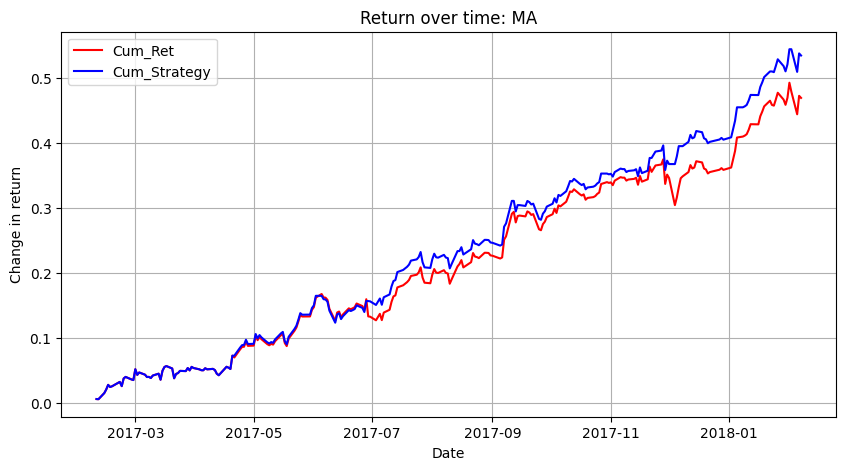

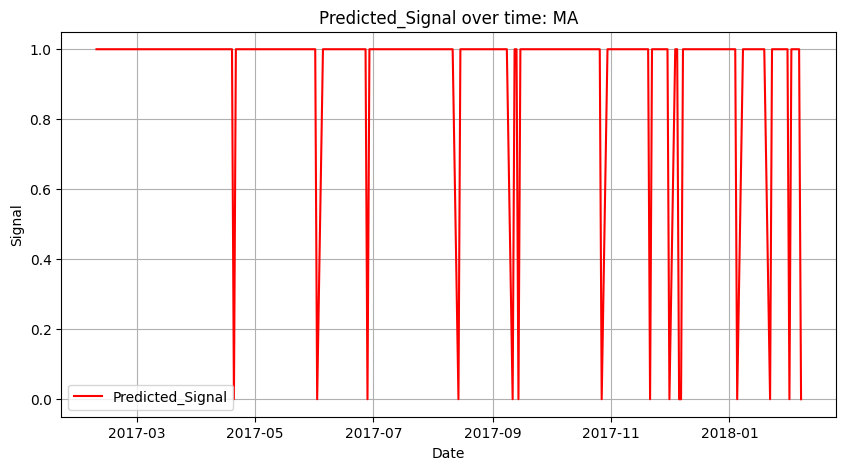

Modeling  COST
            Open-Close  High-Low
date                            
2013-02-08       -0.41     1.150
2013-02-11        0.88     1.180
2013-02-12        0.45     0.700
2013-02-13        0.35     1.420
2013-02-14       -0.98     1.048
...                ...       ...
2018-02-01       -0.06     2.960
2018-02-02        0.26     2.800
2018-02-05        7.89     9.575
2018-02-06       -6.10     9.040
2018-02-07        1.41     3.120

[1259 rows x 2 columns]
Test accuracy: 0.4722222222222222
Train accuracy: 0.5302879841112215
              open     high     low   close   volume Ticks  Open-Close  \
date                                                                     
2017-02-08  167.50  168.570  167.50  168.42  2089921  COST       -0.92   
2017-02-09  168.45  171.415  168.17  170.96  2606898  COST       -2.51   
2017-02-10  171.65  172.270  170.27  172.00  2070000  COST       -0.35   
2017-02-13  172.49  172.490  170.78  171.96  2272213  COST        0.53   
2017-02-14  171.66

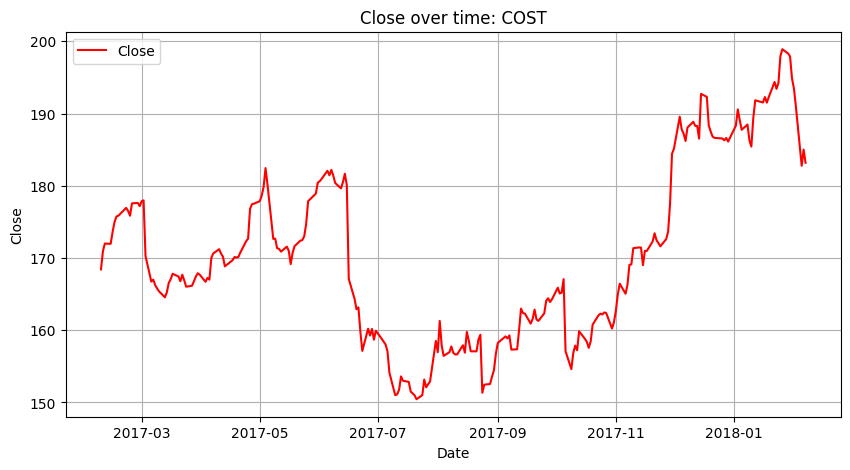

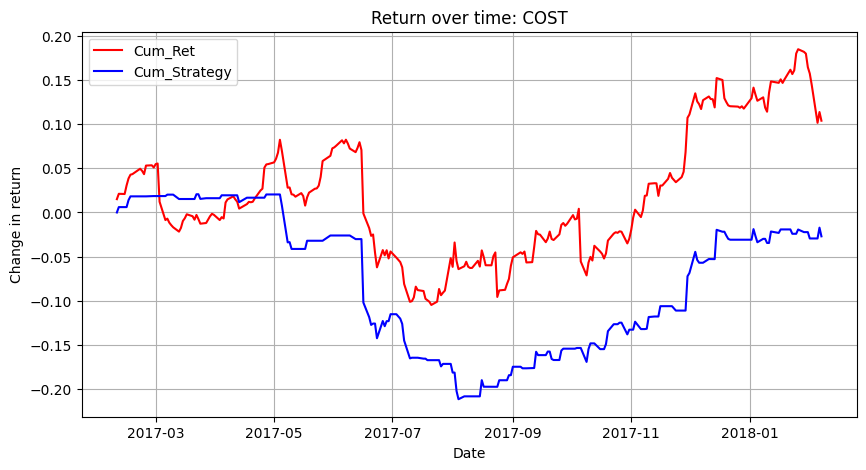

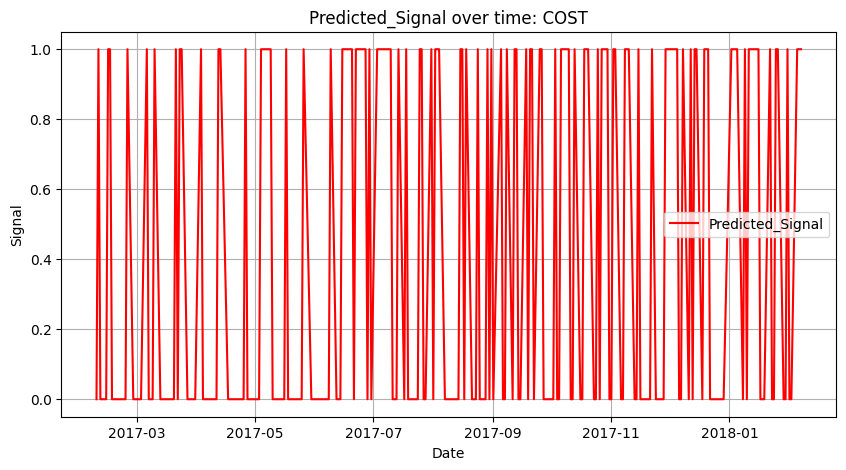

Modeling  PEP
            Open-Close  High-Low
date                            
2013-02-08        0.16    0.4000
2013-02-11        0.14    0.4400
2013-02-12        0.25    0.3900
2013-02-13        0.74    1.3900
2013-02-14       -0.16    1.7000
...                ...       ...
2018-02-01       -0.38    1.7300
2018-02-02        1.24    1.8800
2018-02-05        4.11    5.2499
2018-02-06       -1.12    3.8000
2018-02-07        0.47    3.0200

[1259 rows x 2 columns]
Test accuracy: 0.5357142857142857
Train accuracy: 0.5422045680238332
              open     high       low   close   volume Ticks  Open-Close  \
date                                                                       
2017-02-08  105.50  106.230  105.2500  105.69  3407089   PEP       -0.19   
2017-02-09  105.42  106.490  105.0200  105.97  4012387   PEP       -0.55   
2017-02-10  105.83  106.345  105.5868  106.10  2475506   PEP       -0.27   
2017-02-13  106.50  106.690  105.8800  106.52  3464318   PEP       -0.02   
2017-02

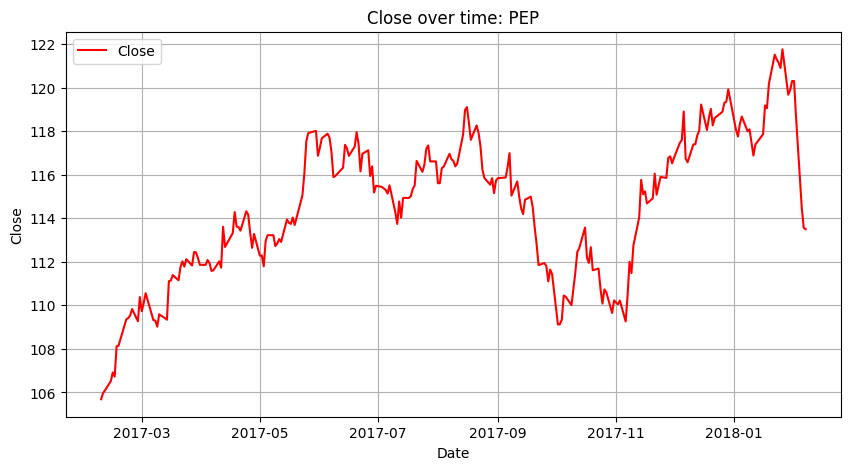

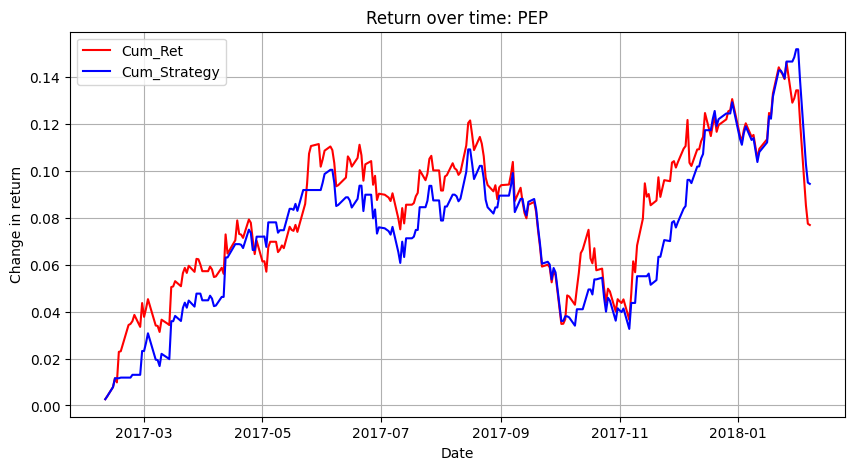

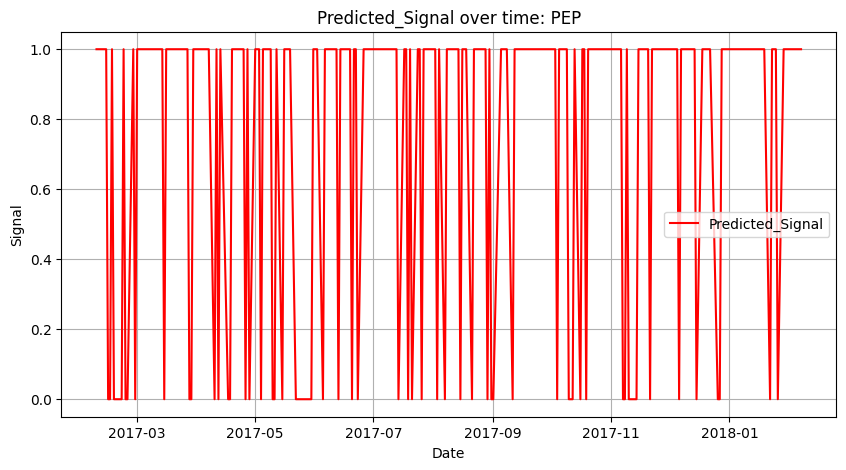

Modeling  CAT
            Open-Close  High-Low
date                            
2013-02-08       -0.75    1.4000
2013-02-11        0.36    0.6900
2013-02-12       -0.55    0.7400
2013-02-13        0.71    1.4800
2013-02-14       -0.01    1.0000
...                ...       ...
2018-02-01       -1.00    3.5600
2018-02-02        3.28    4.2700
2018-02-05        3.85   16.0800
2018-02-06       -8.34    9.7499
2018-02-07        1.02    3.8100

[1259 rows x 2 columns]
Test accuracy: 0.4444444444444444
Train accuracy: 0.5322740814299901
             open    high    low  close   volume Ticks  Open-Close  High-Low  \
date                                                                           
2017-02-08  93.00  93.000  92.11  92.91  4083514   CAT        0.09     0.890   
2017-02-09  93.06  94.180  92.69  93.96  3994308   CAT       -0.90     1.490   
2017-02-10  94.87  96.620  94.50  96.31  5600224   CAT       -1.44     2.120   
2017-02-13  97.69  99.045  97.16  98.50  6995085   CAT       -0

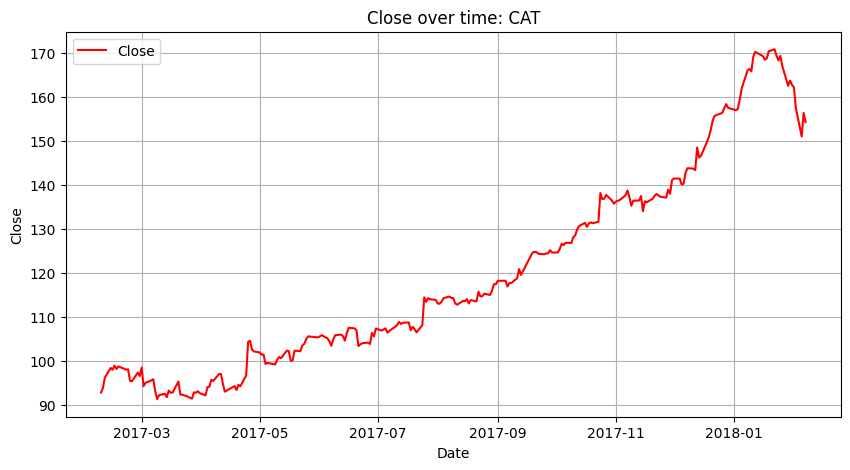

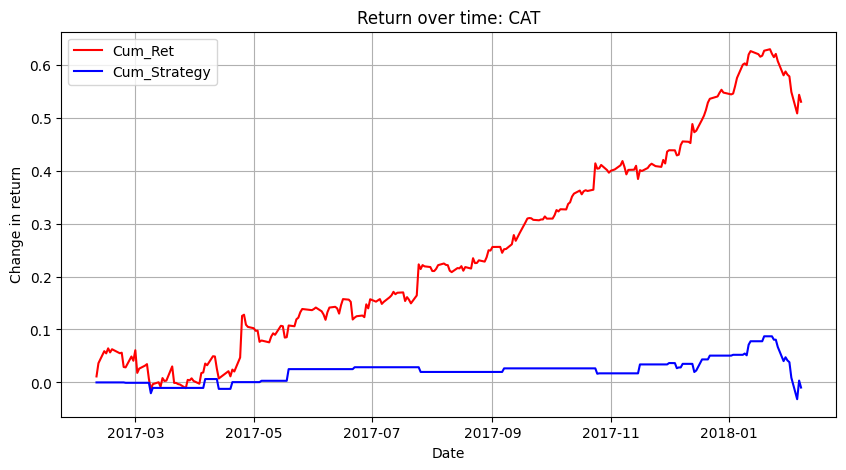

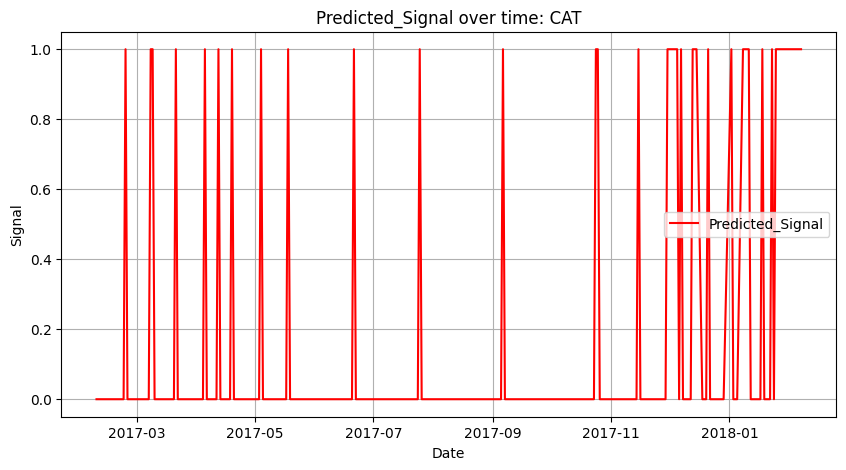

Modeling  WM
            Open-Close  High-Low
date                            
2013-02-08       -0.09    0.5255
2013-02-11        0.00    0.2000
2013-02-12       -0.16    0.2900
2013-02-13       -0.12    0.3772
2013-02-14       -1.15    1.9400
...                ...       ...
2018-02-01        0.62    1.2200
2018-02-02        0.73    1.5500
2018-02-05        4.35    4.7200
2018-02-06       -0.89    4.0990
2018-02-07        0.15    1.8400

[1259 rows x 2 columns]
Test accuracy: 0.5634920634920635
Train accuracy: 0.548162859980139
             open    high    low  close   volume Ticks  Open-Close  High-Low  \
date                                                                           
2017-02-08  69.85  70.130  69.75  70.01  1604552    WM       -0.16     0.380   
2017-02-09  69.89  70.305  69.74  70.25  1512116    WM       -0.36     0.565   
2017-02-10  70.16  70.830  70.04  70.54  1617277    WM       -0.38     0.790   
2017-02-13  70.59  70.990  70.51  70.84  1548833    WM       -0.2

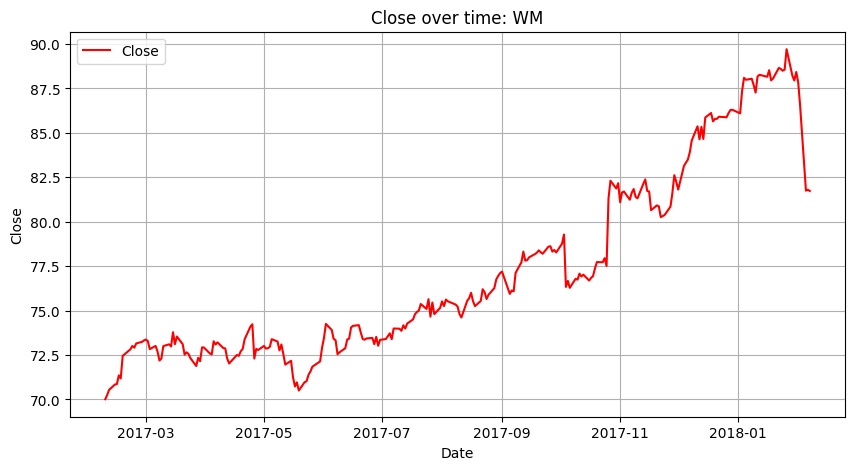

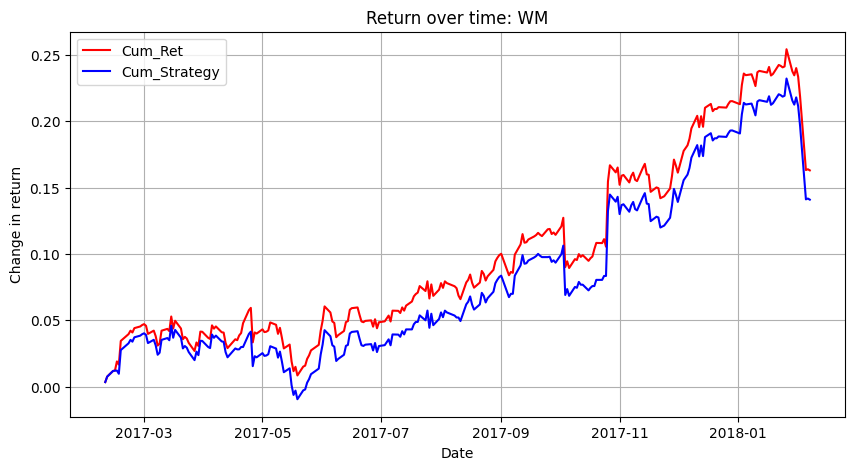

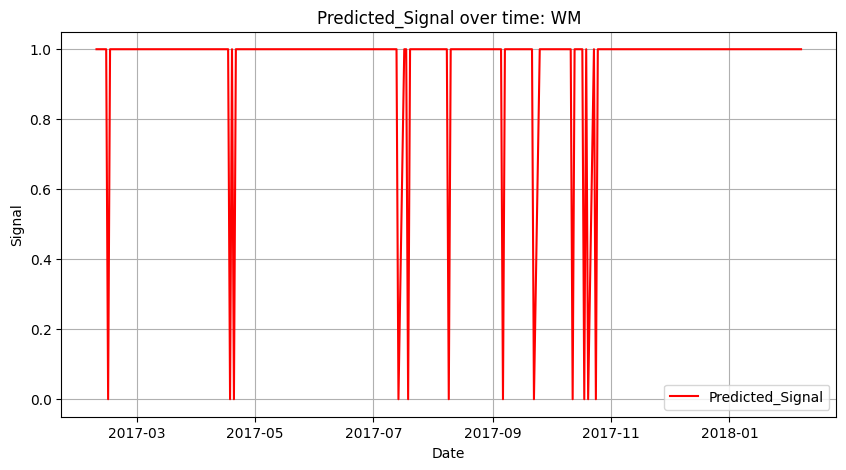

Modeling  ITW
            Open-Close  High-Low
date                            
2013-02-08       -0.82    0.9400
2013-02-11       -0.10    0.4500
2013-02-12       -0.15    0.4600
2013-02-13       -0.34    0.6460
2013-02-14       -0.15    0.4699
...                ...       ...
2018-02-01       -0.48    2.9199
2018-02-02        1.53    3.4000
2018-02-05        8.41   10.8700
2018-02-06       -5.93    8.7390
2018-02-07        0.21    4.5300

[1259 rows x 2 columns]
Test accuracy: 0.5833333333333334
Train accuracy: 0.551142005958292
              open    high     low   close   volume Ticks  Open-Close  \
date                                                                    
2017-02-08  126.92  127.39  126.52  127.12   759251   ITW       -0.20   
2017-02-09  127.30  128.26  127.15  127.26  1164117   ITW        0.04   
2017-02-10  127.64  128.10  127.18  128.00   725736   ITW       -0.36   
2017-02-13  128.34  129.64  128.34  129.37   897696   ITW       -1.03   
2017-02-14  129.30  129.71

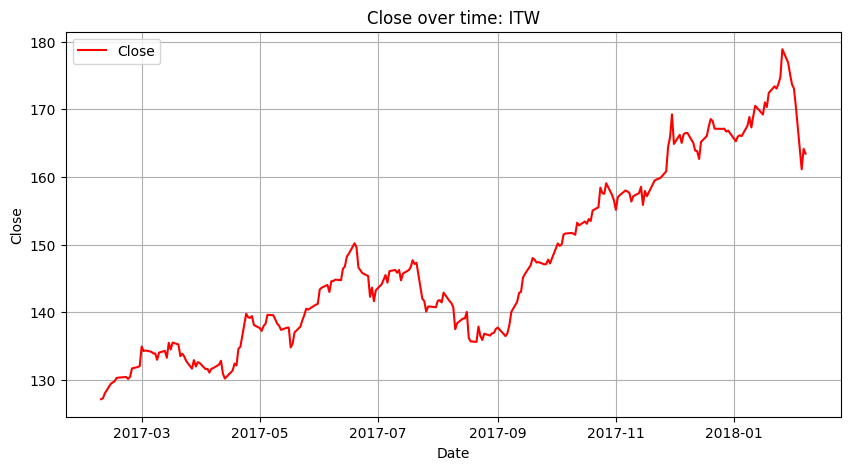

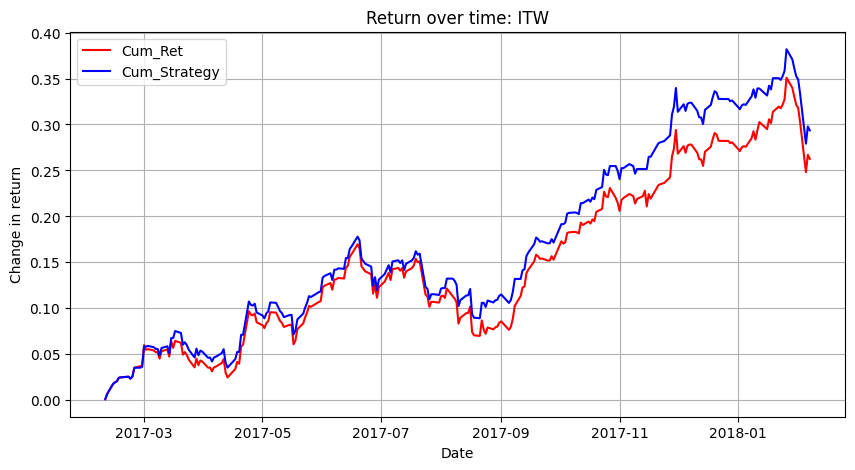

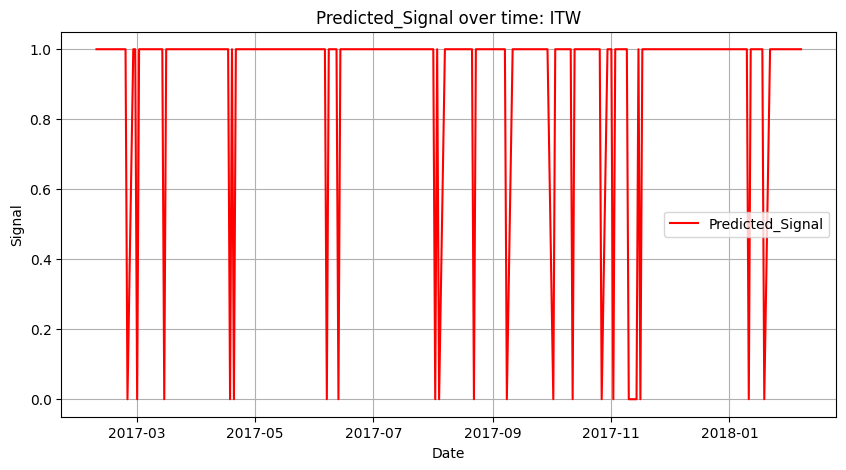

In [25]:
# Try this by looping through multiple stock symbols

# Either pick a few stocks to try
tick_names = ['AMZN', 'AAPL', 'MSFT', 'WMT', 'V', 'MA', 'COST', 'PEP', 'CAT', 'WM', 'ITW']

# OR do it for all stocks
#tick_names = unique_values

# Train a model for each stock
for name in tick_names:
    print("Modeling ", name)
    stock = df.loc[df['Ticks'] == name]
    stock.index = pd.to_datetime(stock['date']) 

    stock = stock.drop(['date'], axis='columns') 
    stock['Open-Close'] = stock['open'] - stock['close']
    stock['High-Low'] = stock['high'] - stock['low']
      
    # Store all predictor variables in a variable X 
    X = stock[['Open-Close', 'High-Low']] 

    X_cleaned = X[~np.isnan(X).any(axis=1)]
    print(X)
    y = np.where(stock['close'].shift(-1) > stock['close'], 1, 0) 
    split_percentage = 0.8
    split = int(split_percentage*len(stock)) 
      
    # Train data set 
    X_train = X[:split] 
    y_train = y[:split] 
      
    # Test data set 
    X_test = X[split:] 
    y_test = y[split:]

    svm = SVC()
    cls = svm.fit(X_train, y_train)
    
    y_pred = cls.predict(X_test)
    y_pred_train = cls.predict(X_train)

    accuracy = accuracy_score(y_test, y_pred)
    print("Test accuracy:", accuracy)
    
    accuracy = accuracy_score(y_train, y_pred_train)
    print("Train accuracy:", accuracy)

    # Only show the returns of the test period:

    stock_future = stock[split:]

    stock_future['Predicted_Signal'] = cls.predict(X_test)
    stock_future['Return'] = stock_future['close'].pct_change()
    stock_future['Strategy_Return'] = stock_future.Return * stock_future.Predicted_Signal.shift(1)
    stock_future['Cum_Ret'] = stock_future['Return'].cumsum() 
    stock_future['Cum_Strategy'] = stock_future['Strategy_Return'].cumsum() 

    print(stock_future.head())

    plt.figure(figsize=(10, 5))
    plt.plot(stock_future['close'],color='red', label="Close") 
    plt.title('Close over time: ' + name, )
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(stock_future['Cum_Ret'],color='red', label="Cum_Ret") 
    plt.plot(stock_future['Cum_Strategy'],color='blue', label="Cum_Strategy")
    plt.title('Return over time: ' + name, )
    plt.xlabel('Date')
    plt.ylabel('Change in return')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(stock_future['Predicted_Signal'],color='red', label="Predicted_Signal") 
    plt.title('Predicted_Signal over time: ' + name, )
    plt.xlabel('Date')
    plt.ylabel('Signal')
    plt.legend()
    plt.grid(True)
    plt.show()


    # # Plot the decision boundary surface, warning his takes a LONG time to run
    # fig, ax = plt.subplots()

    # title = ('Decsion boundary of rbf SVM for Open-Close and High-Low features: ' + name)
    # # Get Y
    # y = y_train
    
    # # Set-up grid for plotting.
    # X0, X1 = X_train['Open-Close'].to_numpy(), X_train['High-Low'].to_numpy()
    # xx, yy = make_meshgrid(X0, X1)
    
    # plot_contours(ax, cls, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    # ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    # ax.set_ylabel('High-Low')
    # ax.set_xlabel('Open-Close')
    # ax.set_xticks(())
    # ax.set_yticks(())
    # ax.set_title(title)
    # ax.legend()
    # plt.show()



Modeling  AAL
Test accuracy: 0.503968253968254
Train accuracy: 0.5471698113207547
Modeling  AAPL
Test accuracy: 0.5
Train accuracy: 0.5362462760675273
Modeling  AAP
Test accuracy: 0.46825396825396826
Train accuracy: 0.5342601787487586
Modeling  ABBV
Test accuracy: 0.5753968253968254
Train accuracy: 0.5571002979145978
Modeling  ABC
Test accuracy: 0.5198412698412699
Train accuracy: 0.551142005958292
Modeling  ABT
Test accuracy: 0.5238095238095238
Train accuracy: 0.5253227408142999
Modeling  ACN
Test accuracy: 0.5992063492063492
Train accuracy: 0.5431976166832175
Modeling  ADBE
Test accuracy: 0.5793650793650794
Train accuracy: 0.5342601787487586
Modeling  ADI
Test accuracy: 0.5198412698412699
Train accuracy: 0.5412115193644489
Modeling  ADM
Test accuracy: 0.5357142857142857
Train accuracy: 0.5610724925521351
Modeling  ADP
Test accuracy: 0.5277777777777778
Train accuracy: 0.5501489572989077
Modeling  ADSK
Test accuracy: 0.4801587301587302
Train accuracy: 0.5461767626613704
Modeling  ADS
Te

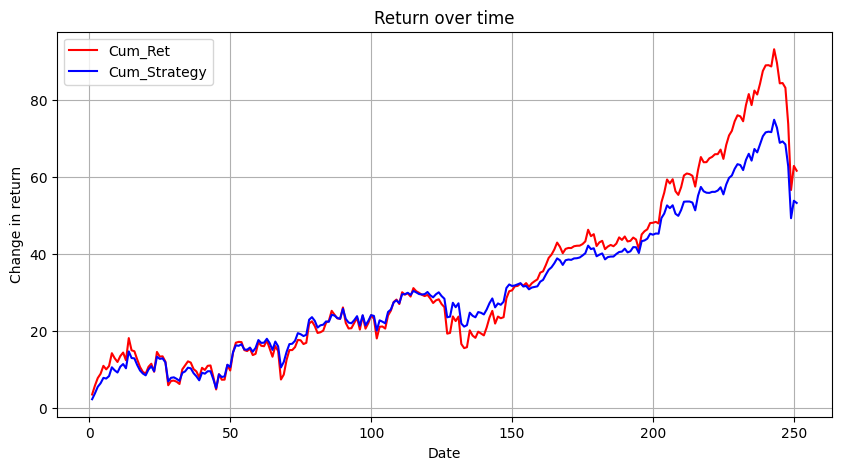

In [26]:
# Try this by looping through multiple stock symbols

# OR do it for all stocks
tick_names = unique_values


# Collect the cumulative return over the entire S&P500
split_percentage = 0.8
split = int(split_percentage*len(X)) 

expected_len = len(X[split:])

total_cum = np.zeros(expected_len)
strategic_cum = np.zeros(expected_len)

# Train a model for each stock
for name in tick_names:
    print("Modeling ", name)
    stock = df.loc[df['Ticks'] == name]
    stock.index = pd.to_datetime(stock['date']) 

    stock = stock.drop(['date'], axis='columns') 
    stock['Open-Close'] = stock['open'] - stock['close']
    stock['High-Low'] = stock['high'] - stock['low']
      
    # Store all predictor variables in a variable X 
    X = stock[['Open-Close', 'High-Low']] 
    y = np.where(stock['close'].shift(-1) > stock['close'], 1, 0) 
      
    # Train data set 
    X_train = X[:split] 
    y_train = y[:split] 
      
    # Test data set 
    X_test = X[split:] 
    y_test = y[split:]

    if (len(X_test) != expected_len):
        print("Count Error for  ", name)
        print("SKIPING!!!!")
        # Skip rows that dont have the valid nuber of columns
        continue

    try:
        svm = SVC()
        cls = svm.fit(X_train, y_train)
        
        y_pred = cls.predict(X_test)
        y_pred_train = cls.predict(X_train)
    
        accuracy = accuracy_score(y_test, y_pred)
        print("Test accuracy:", accuracy)
        
        accuracy = accuracy_score(y_train, y_pred_train)
        print("Train accuracy:", accuracy)
    
        # Only show the returns of the test period:
    
        stock_future = stock[split:]
    
        stock_future['Predicted_Signal'] = cls.predict(X_test)
        stock_future['Return'] = stock_future['close'].pct_change()
        stock_future['Strategy_Return'] = stock_future.Return * stock_future.Predicted_Signal.shift(1)
        stock_future['Cum_Ret'] = stock_future['Return'].cumsum() 
        stock_future['Cum_Strategy'] = stock_future['Strategy_Return'].cumsum() 

        total_cum = total_cum + stock_future['Cum_Ret'].to_numpy()
        strategic_cum = strategic_cum + stock_future['Cum_Strategy'].to_numpy()
    except:
        print("Thrown Error for  ", name)
        print("SKIPING!!!!")

    # plt.figure(figsize=(10, 5))
    # plt.plot(stock_future['close'],color='red', label="Close") 
    # plt.title('Close over time: ' + name, )
    # plt.xlabel('Date')
    # plt.ylabel('Close')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # plt.figure(figsize=(10, 5))
    # plt.plot(stock_future['Cum_Ret'],color='red', label="Cum_Ret") 
    # plt.plot(stock_future['Cum_Strategy'],color='blue', label="Cum_Strategy")
    # plt.title('Return over time: ' + name, )
    # plt.xlabel('Date')
    # plt.ylabel('Change in return')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # plt.figure(figsize=(10, 5))
    # plt.plot(stock_future['Predicted_Signal'],color='red', label="Predicted_Signal") 
    # plt.title('Predicted_Signal over time: ' + name, )
    # plt.xlabel('Date')
    # plt.ylabel('Signal')
    # plt.legend()
    # plt.grid(True)
    # plt.show()


    # # Plot the decision boundary surface, warning his takes a LONG time to run
    # fig, ax = plt.subplots()

    # title = ('Decsion boundary of rbf SVM for Open-Close and High-Low features: ' + name)
    # # Get Y
    # y = y_train
    
    # # Set-up grid for plotting.
    # X0, X1 = X_train['Open-Close'].to_numpy(), X_train['High-Low'].to_numpy()
    # xx, yy = make_meshgrid(X0, X1)
    
    # plot_contours(ax, cls, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    # ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    # ax.set_ylabel('High-Low')
    # ax.set_xlabel('Open-Close')
    # ax.set_xticks(())
    # ax.set_yticks(())
    # ax.set_title(title)
    # ax.legend()
    # plt.show()

plt.figure(figsize=(10, 5))
plt.plot( total_cum,color='red', label="Cum_Ret") 
plt.plot(strategic_cum,color='blue', label="Cum_Strategy")
plt.title('Return over time' )
plt.xlabel('Date')
plt.ylabel('Change in return')
plt.legend()
plt.grid(True)
plt.show()